# Predicción del precio de venta de una vivienda.
Lucía Revuelta Flores
<hr>

## Planteamiento del problema

En contadas ocasiones hemos oído hablar de que un amigo, familiar o vecino ha comprado una vivienda en una determina ubicación. En muchas otras, hemos estimado a ojo, cuál sería el precio aproximado y, al conocerlo de propia mano, nos hemos asombrado porque quizás nuestras predicciones no han sido muy acertadas. Este problema, consistirá en emplear técnicas predictivas gracias a los algoritmos de Machine Learning para **predecir el precio de venta de una vivienda** en la ciudad de Ames.
<hr>

## Introducción

Antes de introducirnos en el mundo del aprendizaje automático, o denominado en inglés bajo el término 'machine learning', haremos hincapié en cómo se debe abordar un problema de esta índole. Es común que, al inicio, nos sintamos impresionados por la magnitud de campos y datos con los que trabajaremos. Comúnmente, solemos sumergirnos en el problema de forma precipitada sin entender bien qué es lo que se nos pide y sin comprender las variables que lo acompañan. Por tanto, es recomendable tener un espíritu filosófico para relacionar entre sí las diferentes características y ser capaces de estrujar cada una de ellas. Esto nos permitirá sacar conclusiones claras sobre la relevancia que tienen en el problema. Para ello, vamos a necesitar tener unos sólidos conocimientos en estadística, y si no son sólidos, grandes habilidades en la búsqueda de información (googleando). El lenguaje empleado será Python, nuestro mejor aliado.

Una vez que hallamos examinado los datos de forma exhaustiva y entendiendo la pregunta que se nos plantea, lo siguiente será determinar ante qué tipo de problema estamos. 
* **¿Es un problema supervisado o no supervisado?** 


En aprendizaje supervisado, típicamente se tiene acceso a un conjunto $p$ de variables de entrada, $x_{1}$, $x_{2}$, $x_{3}$,..., $x_{p}$, medidas en $n$ observaciones, y a una variable de salida $Y$, también medida en esas $n$ observaciones. El objetivo general es predecir la salida $Y$ a partir de las entradas $x_{1}$, $x_{2}$,.., $x_{p}$. Las variables de entrada $X$ también reciben nombres como variables predictoras, variables independintes, features, o simplemente variables. A la variable de salida, se le suele llamar variable dependiente, respuesta o **target**.

Por un lado, tenemos una serie de variables de entrada en las que profundizaremos más adelante (número de baños, calidad de la vivienda, vivienda vallada, con piscina, número de dormitorios, de habitaciones, calidad de la cocina, número de chimeneas, calidad de la misma, número de baños, año de construcción de la vivienda, etc) que servirán en la predicción. Por otro, la variable dependiente o target (que queremos predecir) será el precio de la vivienda. 

El objetivo de los modelos supervisados es, por tanto, estimar una función $f(X)$ que realice el mapeo entre variables de entrada y variables de salida. Esta estimación $f'(X)$ no es exactamente $f(X)$, siempre existe un sesgo. Nuestro objetivo como científicos de datos es estimar $f(X)$ de la mejor manera posible para que la estimación de la respuesta se parezca lo máximo a su valor real.


Se descarta que sea un problema no supervisado, pues estos no cuentan con ninguna variable predictora en el conjunto de datos, y en este ejercicio, como ya he explicado, sí la tenemos (lo veremos en los datos).
<hr>



Dentro del aprendizaje supervisado, se encuentran dos tipos de problemas:
1) Problema de regresión.
2) Problema de clasificación.

Los problemas de regresión son aquellos en los que la variable dependiente es una *variable cuantitativa*. El modelo de regresión puede ser lineal o no lineal dependiendo de si es capaz de captar relaciones lineales o no, entre las variables $X$ e $Y$. Las *variables cuantitativas* son aquellas que pueden tomar diferentes valores medibles y observables.

Ejemplos:

¿Cuántas ventas va a tener una empresa de retail en función de la inversión, el tamaño de la plantilla y el número de tiendas? <br>
¿Cuál es la tasa de empleo esperada en un país en función de la oferta monetaria del banco central, la oferta de trabajo y la demanda de profesionales?

En los problemas de clasificación, sin embargo, la variable dependiente o de salida es una variable categórica o cualitativa. Este tipo de variables no toman órdenes naturales medibles. No representan cantidad objetivas.

Ejemplos:
Una persona llega a emergencias con unos síntomas que podrían encajar con tres condiciones médicas distintas:

 Catarro, resfriado o gripe. ¿Cuál de las tres condiciones es más probable que tenga? <hr>

## Conclusiones

Se trata de un **problema supervisado de regresión**. Existen diferentes técnicas para predecir el valor de la vivienda (regresión lineal, árboles de decisión, máquinas de soporte vectorial, k-vecinos más cercanos, etc). Sin embargo, antes de crear el modelo, es imprescindible limpiar el dataset ya que el hecho de tener valores faltantes, outliers, inexistencia de normalidad de las variables, devolvería un modelo defectuoso y poco fiable.


# Flujo de trabajo

Partimos de dos ficheros csv, un fichero donde están los datos de entrenamiento (trian.csv) y otro donde están los valores de testing (test.csv) que servirán para evaluar el modelo creado. A partir del dataset de entrenamiento, limpiaremos y haremos un preprocesado de los datos para construir el modelo que mejor se ajuste para estimar el precio de la vivienda. 

![FLUJO TRABAJO](Slide1.jpg)


Importamos las librerías que emplearemos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.graphics.gofplots as sm
import warnings
import missingno as msno
from scipy.stats import norm
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
# datos con los que crearemos el modelo
pd.set_option('display.max_columns', None)
df_train = pd.read_csv("./data/train.csv")
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Echando un vistazo (muy por encima a los datos) tenemos dos cosas claras:
* 1) La variable *Id* no aporta ningún significado a nuestro estudio, ya que es una especia de índice.
* 2) La variable **target** o dependiente creo que todos sabemos cuál es: 'SalePrice' (LO MÁS IMPORTANTE DEL PROBLEMA, SABER IDENTIFICARLA).

In [3]:
df_train = df_train.drop(['Id'],axis=1).copy()

In [4]:
#datos para testear el model
df_test = pd.read_csv("./data/test.csv")
df_test = df_test.drop(['Id'],axis=1).copy()

No debemos confundir los dataset test.csv y train.csv con los conjuntos de entrenamiento y test que creamos a la hora de realizar el modelo. Es decir, el modelo lo vamos a crear a partir del df_train y el df_test nosayudará para revisar que los resultados obtenidos son válidos. 

¿Qué columnas tiene el dataset df_train?

In [5]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

¿Cuántas columnas y filas tiene nuestro dataset?
* 1460 registros
* 81 columnas

In [6]:
df_train.shape

(1460, 80)

¿Qué variables son numéricas y qué variables categóricas?

In [7]:
#variables numéricas
numeric_features = df_train.select_dtypes(include = [np.number])
numeric_features = numeric_features.drop(['SalePrice'], axis = 1)
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Dentro de la variables numéricas debemos diferenciar entre continuas y discretas. <br>
* **Continuas**: LotArea, BsmtUnfSF,1stFlrSF, etc. <br>
* **Discretas**: GarageCars, FullBath, etc. <br>

NOTA: La diferencia entre una variable discreta y una variable continua es el número de valores que pueden tomar. Una variable continua puede tomar cualquier valor, en cambio, una variable discreta no acepta cualquier valor sino que solo puede tomar un número contable de valores.

In [8]:
numeric_features.head(4)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006


In [9]:
#varibles numéricas discretas
disc_num_features = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
#variables numéricas continuas.
numeric_cont_features = numeric_features.drop(disc_num_features, axis=1).copy()
lista_numeric_cont_features = numeric_cont_features.columns.to_list()

In [10]:
#variables categóricas
categorical_fetures = df_train.select_dtypes(exclude = [np.number])
categorical_fetures.columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Contemos los valores únicos en cada columna para tener más información acerca de los datos que hay en cada variable.

In [11]:
pd.set_option('display.max_rows', None)
print(df_train.nunique())

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

¿Qué pasa con las restantes variables, qué significado tienen?
# Descripción variables del dataset.

El **data_description.txt** nos permitirá entender qué significa cada campo. Sin este archivo, sería muy complicado entender dichas variables. Esta parte, resulta la más tediosa pero debe hacerse con ganas. 
Se hablará como medida de longitud de pies y no de metros.
<hr>

* MSSubClass: Identifica el tipo de vivienda involucrada en la venta, cada número identifica un tipo de vivienda.

* MSZoning: Clasificación general de la zona en la que está la vivienda (agricultura, comercial, industrial, residencial, etc)

* LotFrontage: Pies lineales de calle conectados a la propiedad.

* LotArea: Tamaño del área de la vivienda.

* Street: Tipo de acceso por carretera a la propiedad (gravilla o pavimento).

* Alley (callejón): Tipo de callejón de acceso a la propiedad (gravilla, pavimento,nan)

* LotShape: Forma de la propiedad (Reg, IR1 poco irregular, IR2 bastante irregular, IRR3 irregular)

* LandContour: Planitud de la propiedad.


* Utilities: Tipo de utilidades disponibles (electricidad, gras y agua o solo eelctricidad, etc).

* LotConfig: Configuración de la propiedad.


* LandSlope: Pendiente de la propiedad.

* Neighborhood: Barrios dentro de la ciudad de Ames.

* Condition1: Proximidad a varias condiciones ( adyacente a la calle arterial, normal, adyacente a ferrocarril, etc).

* Condition2: Proximidad a varias condiciones.

* BldgType: Tipo de vivienda (individual, dúplex, etc).


* HouseStyle: Estilo de vivienda (un piso, dos pisos, etc)

* OverallQual: Clasifica el material general y el acabado de la casa.

* OverallCond:  Evalúa el estado general de la casa.

* YearBuilt: Año de construcción de la vivienda.

* YearRemodAdd: Año de remodelación de la vivienda.

* RoofStyle: Tipo de techo (cobertizo, granero,etc)

* RoofMatl: Material del techo (madera, metal, etc)

* Exterior1st: Revestimiento exterior de la casa.

* Exterior2nd: Revestimiento exterior de la casa si hay más de un material.


* MasVnrType: Tipo de chapa de mampostería.

* MasVnrArea: Área de chapa de mampostería.

* ExterQual: Evalúa la calidad del material exterior. 

* ExterCond: Evalúa el estado actual del material exterior.

* Foundation: Tipo de fundación (ladrillo, valdosas, etc).

* BsmtQual: Evalúa la altura del sótano.

* BsmtCond: Evalúa el estado general del sótano.

* BsmtExposure: Refers to walkout or garden level walls

* BsmtFinType1: Calificación del área terminada del sótano.

* BsmtFinSF1: Type 1 finished square feet

* BsmtFinType2: Rating of basement finished area (if multiple types)
 

* BsmtFinSF2: Calificación del área terminada del sótano.

* BsmtUnfSF: Pies cuadrados del sótano sin terminal.

* TotalBsmtSF: Superficie total del sótano.

* Heating: Tipo de calefacción.

* HeatingQC: Calidad y estado de la calefacción.

* CentralAir: Aire acondicionado (sí o no).

* Electrical: Tipo de sistema de electricidad en la vivienda.

* 1stFlrSF: Primer piso pies cuadrados.
 
* 2ndFlrSF: Pies cuadrados del segundo piso.

* LowQualFinSF: Pies cudrados que son de baja calidad.

* GrLivArea: Vivienda por encima del suelo.

* BsmtFullBath: Sótano con baños completos.
 
* BsmtHalfBath: Medio baño en el sótano.

* FullBath: Baños completos

* HalfBath: Medio baño completo.

* Bedroom: Dormitorio que no están en el sótano.

* Kitchen: Cocinas por encima del suelo.

* KitchenQual: Calidad de la cocina.

* TotRmsAbvGrd: Total de habitaciones que no están el sótano.

* Functional: Hogar funcional (tiene daños, está bien...)

* Fireplaces: Número de chimeneas.

* FireplaceQu: Calidad de la chimenea.

* GarageType: Localización del garaje (debajo de caso, en una garaje comunitario, etc)

* GarageYrBlt: Año en que fue construido el garaje.

* GarageFinish: Interior del garaje finalizado.

* GarageCars: Plazas de garaje.

* GarageArea: Tamaño del garaje en metros cuadrados.

* GarageQual: Calidad del estado del garaje.

* GarageCond: Condiciones del garaje (excelente, bueno, etc).

* PavedDrive: Entrada pavimentada (pavimentada, parcialmente pavimentada, gravilla).

* WoodDeckSF: Área de madera cubierta.

* OpenPorchSF: Área del porche abierta en pies cuadrados.

* EnclosedPorch: Área de porche cerrada en pies cuadrados.

* 3SsnPorch: Área del pórtico de tres temporadas.

* ScreenPorch: Área de porche en pies cuadrados.

* PoolArea: Área de la piscina.

* PoolQC: Calidad de la piscina.

* Fence: Vallado de la vivienda.

* MiscFeature: Características no cubiertas ( ascensor, segundo garaje, cobertizo, pista de tenis, otros)

* MiscVal:Regla en materia de impuestos, contribuciones de una casa a futuro.

* MoSold: Mes de venta de la casa.

* YrSold: Año de venta de la casa.

* SaleType: Tipo de venta (casa recién construida, escritura de la casa, etc)

* SaleCondition: Condición de la venta (entre familiares, entre tierras colindantes, etc)

<hr>

Como se observa, son muchas las variables que entran en juego a la hora de determinar el valor de venta de una vivienda. La pregunta que nos hacemos es:
¿Todas las variables tendrán la misma influencia a la hora de determinar el precio de venta de una vivienda? ¿Que una vivienda tenga una chimenea o dos o que una vivienda esté vallada o no determinará que sea más o menos cara su venta? ¿Todas las variables tendrán la misma relevancia en el modelo? 


Pero centrémonos por un momento en la variable dependiente. Nos interesa saber más sobre ella. ¿Cuál es su valor máximo,  y su valor mínimo, y sus percentiles?

In [12]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

El precio mínimo será mayor que cero y no tiene ningún valor faltante. Esto es importante ya que en otro caso nos destruiría el modelo.
<hr>

Algo que nos debe preocupar siempre es cómo se distribuye esta variable (y también las restantes). La mayoría de las veces, lo usamos para buscar valores atípicos que podríamos necesitar filtrar más tarde durante el paso de preprocesamiento.

# Análisis de la variable predictora

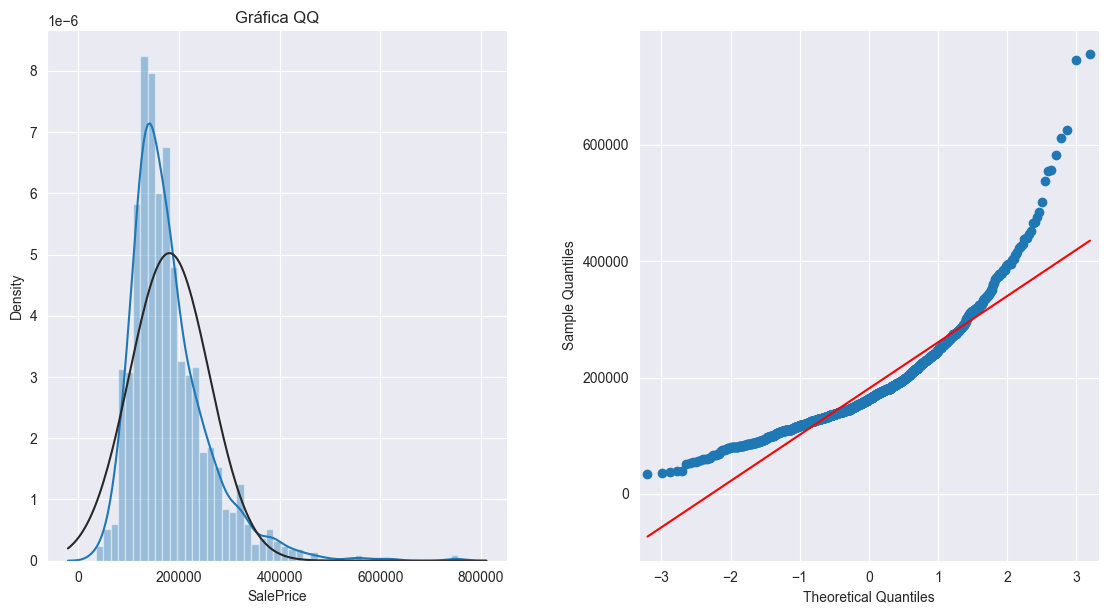

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.distplot(df_train['SalePrice'], kde =True, ax=ax[0], fit=norm)
sm.ProbPlot(df_train['SalePrice']).qqplot(line='s', ax=ax[1])
fig.tight_layout(pad=4.0)

ax[0].set_title('Distribución SalePrice')
ax[0].set_title('Gráfica QQ')
plt.show()

**Observaciones** <br>
1 ) Observamos que los datos se desvían de la distribución normal (campana de Gauss). <br>
2 ) Una distribución está sesgada si uno de sus extremos es más largo que el otro. En nuestra gráfica se observa que la parte derecha presenta un extremo más largo que el izquierdo. Lo cual implica que los datos están sesgados positivamente.

La curtosis es una medida estadística que determina el grado de concentración que presentan los valores de una variable alrededor de la zona central de la distribución de frecuencias. También es conocida como medida de apuntamiento. Para la variable 'SalePrice', se tiene que:

In [14]:
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Kurtosis: 6.536282


Como **kurtosis >3**, se deduce que la distribución es **leptocúrtica**. Esto significa que existe una gran concentración de valores entorno a la media, lo cual es muy positivo. <br>

**NOTA**: Conocer la asimetría de una variable nos hace conocer una característica más de la distribución. Una distribución muy asimétrica podría indicarnos mucha desigualdad, o también que nuestro esfuerzo podría enfocarse en pocos elementos con muy alto valor, y este tipo de decisiones son claves.

Tener un objetivo sesgado afectará al rendimiento general de nuestro modelo de aprendizaje automático, por lo tanto, una forma de proceder será usar **log transformation** en un objetivo sesgado, en nuestro caso, el *SalePrice* para reducir la asimetría de la distribución. Una simple transformación de datos puede resolver el problema. Esta es una de las cosas impresionantes que puedes aprender en los libros de estadística: en caso de sesgo positivo, las transformaciones de registro generalmente funcionan bien.

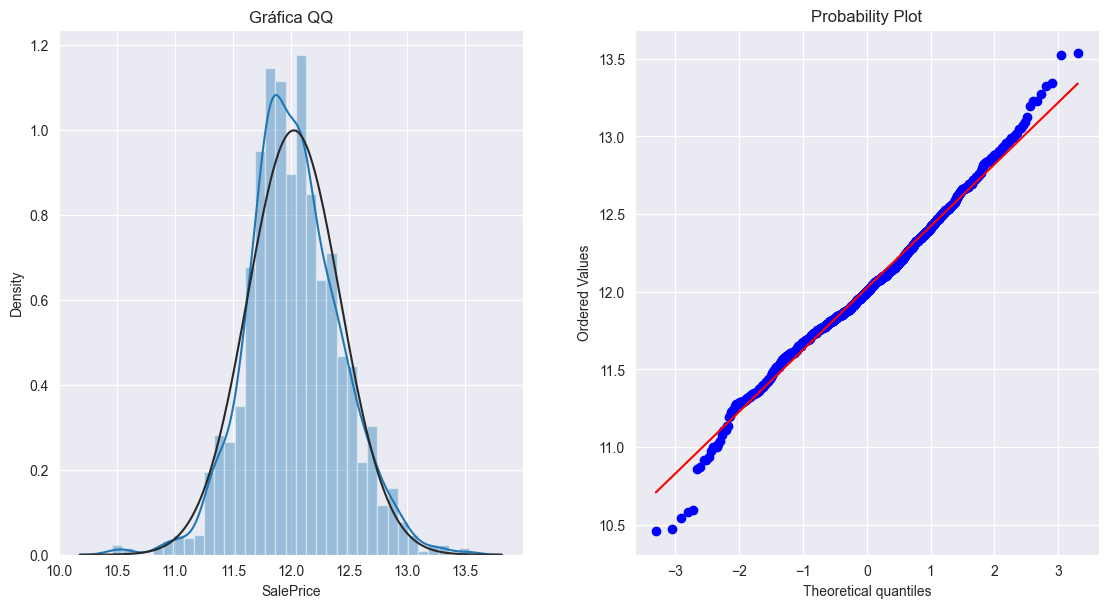

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.distplot(np.log(df_train['SalePrice']),  kde=True, ax = ax[0], fit=norm)
stats.probplot(np.log(df_train['SalePrice']), plot=plt)
fig.tight_layout(pad=4.0)

ax[0].set_title('Distribución SalePrice')
ax[0].set_title('Gráfica QQ')
plt.show()

# Análisis univariable de las variables numéricas.

Para las variables numéricas, siempre nos preocupa la **distribución** de estas características, incluidas las **características estadísticas** de estos campos, por ejemplo, la media, la mediana y la moda. Por lo tanto, normalmente utilizaremos **Distribution plot** para visualizar su distribución de datos. 

## Variables numéricas continuas.

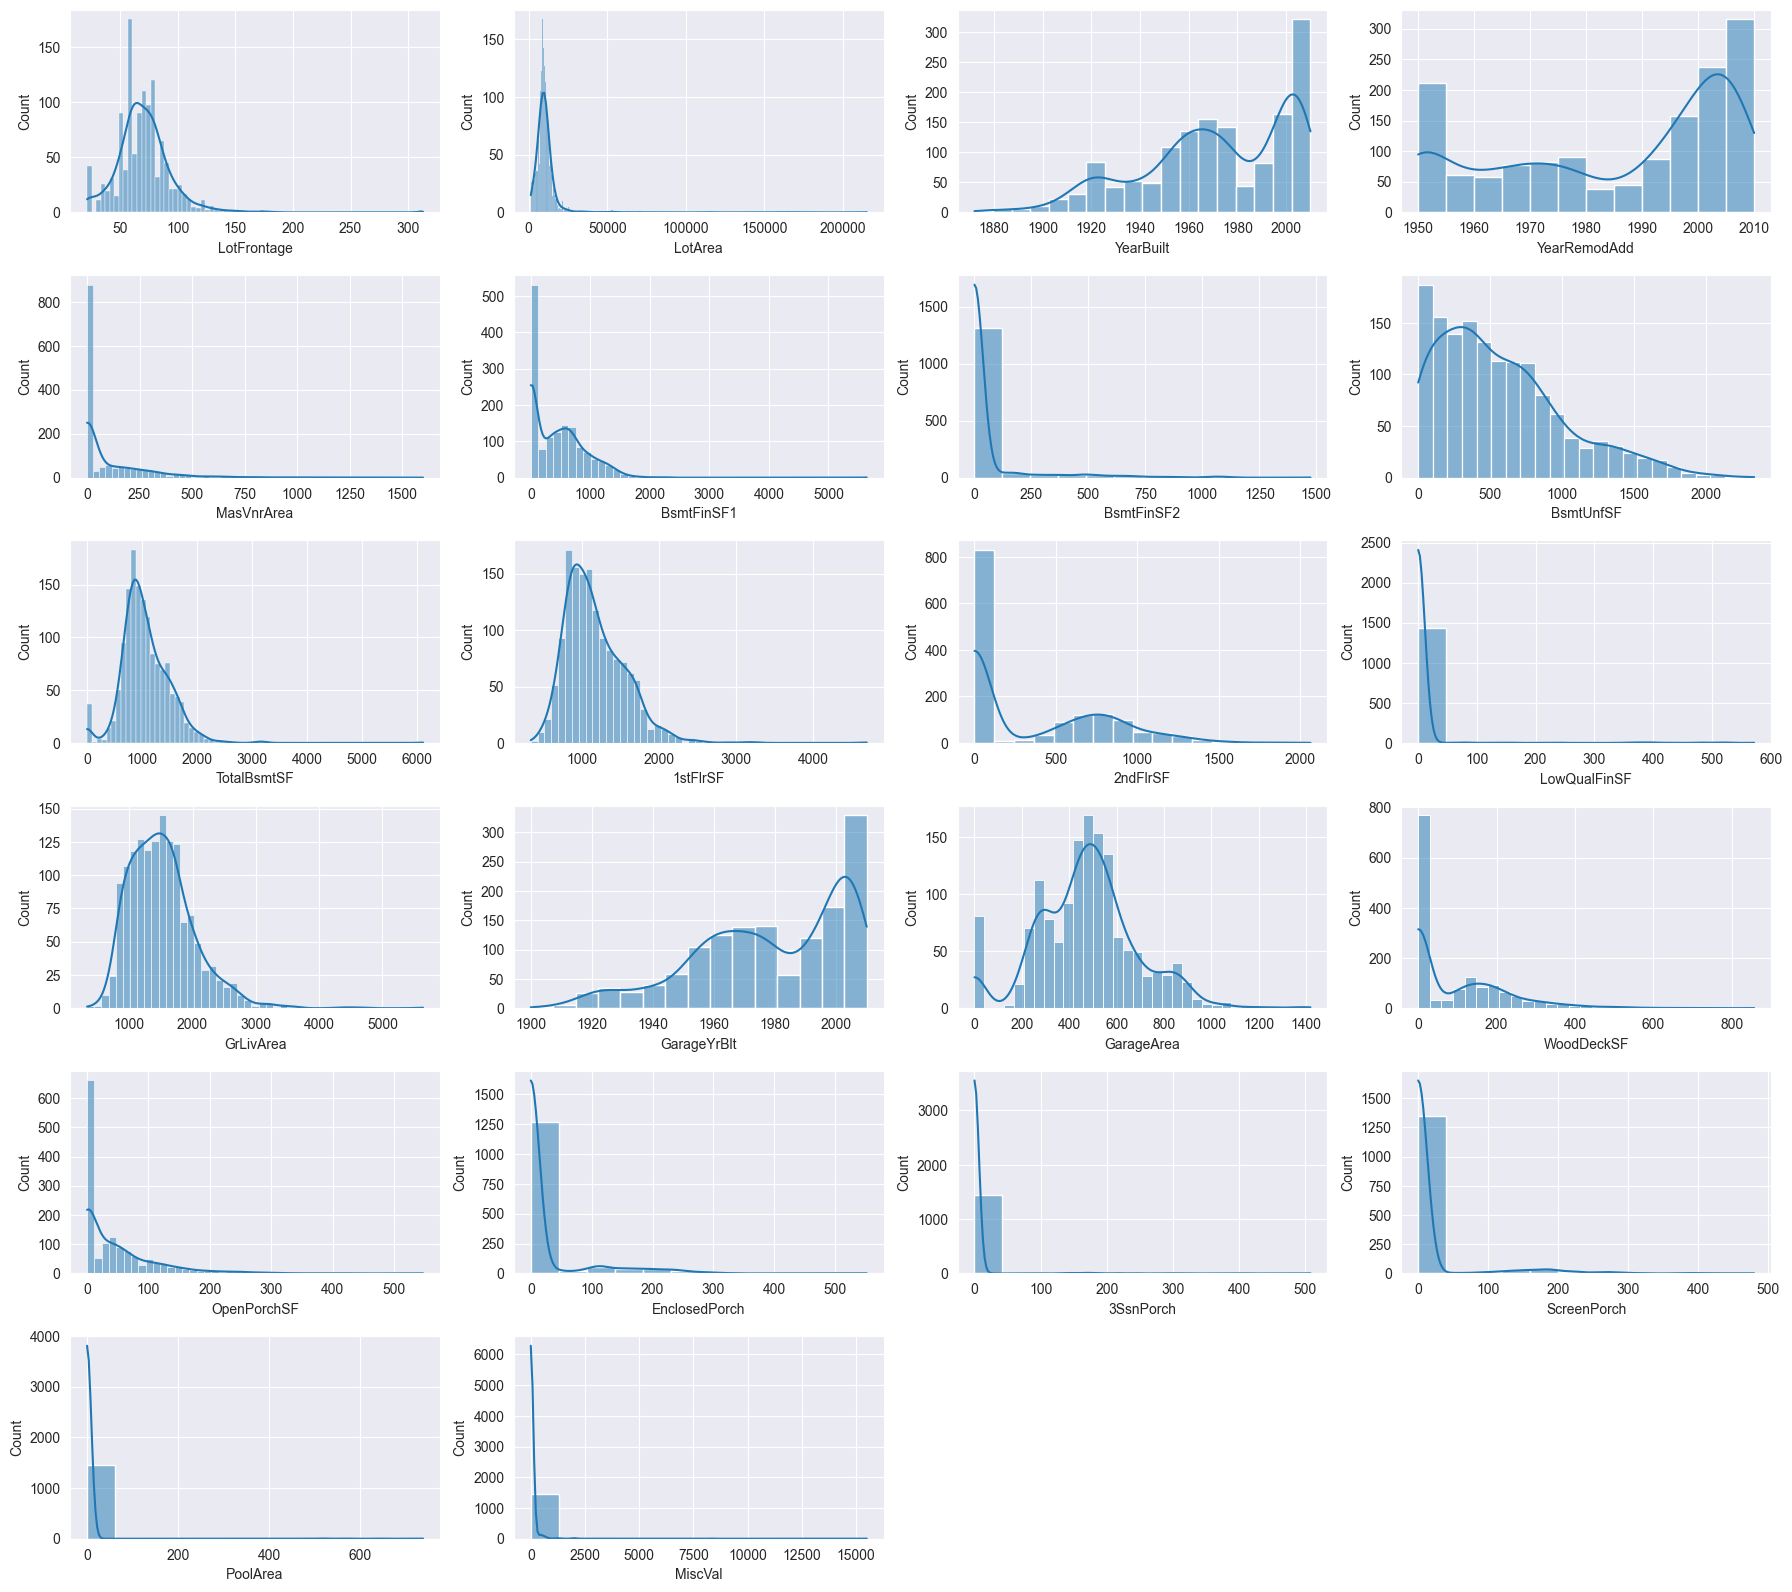

In [16]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(lista_numeric_cont_features):
    plt.subplot(6,4,index+1)
    sns.histplot(numeric_features.loc[:,col].dropna(), kde=True)
fig.tight_layout(pad=1.0)

A simple vista se observan gráficas bastante extrañas. El histograma referente al área de la piscina solo presenta valores en 0, al igual que el histograma referente los metros cuadrados que tiene un porche de tres estaciones, o los pies cuadrados que son de baja calidad, entre otros. Estas gráficas nos dan un idea de cómo se distribuyen los datos, y de qué variables habrá que preprocesar en un futuro.

**Los boxplots** también se usan comúnmente para desenterrar las características estadísticas de cada característica. La mayoría de las veces, lo usamos para buscar valores atípicos que podríamos necesitar filtrar más tarde durante el paso de preprocesamiento. 

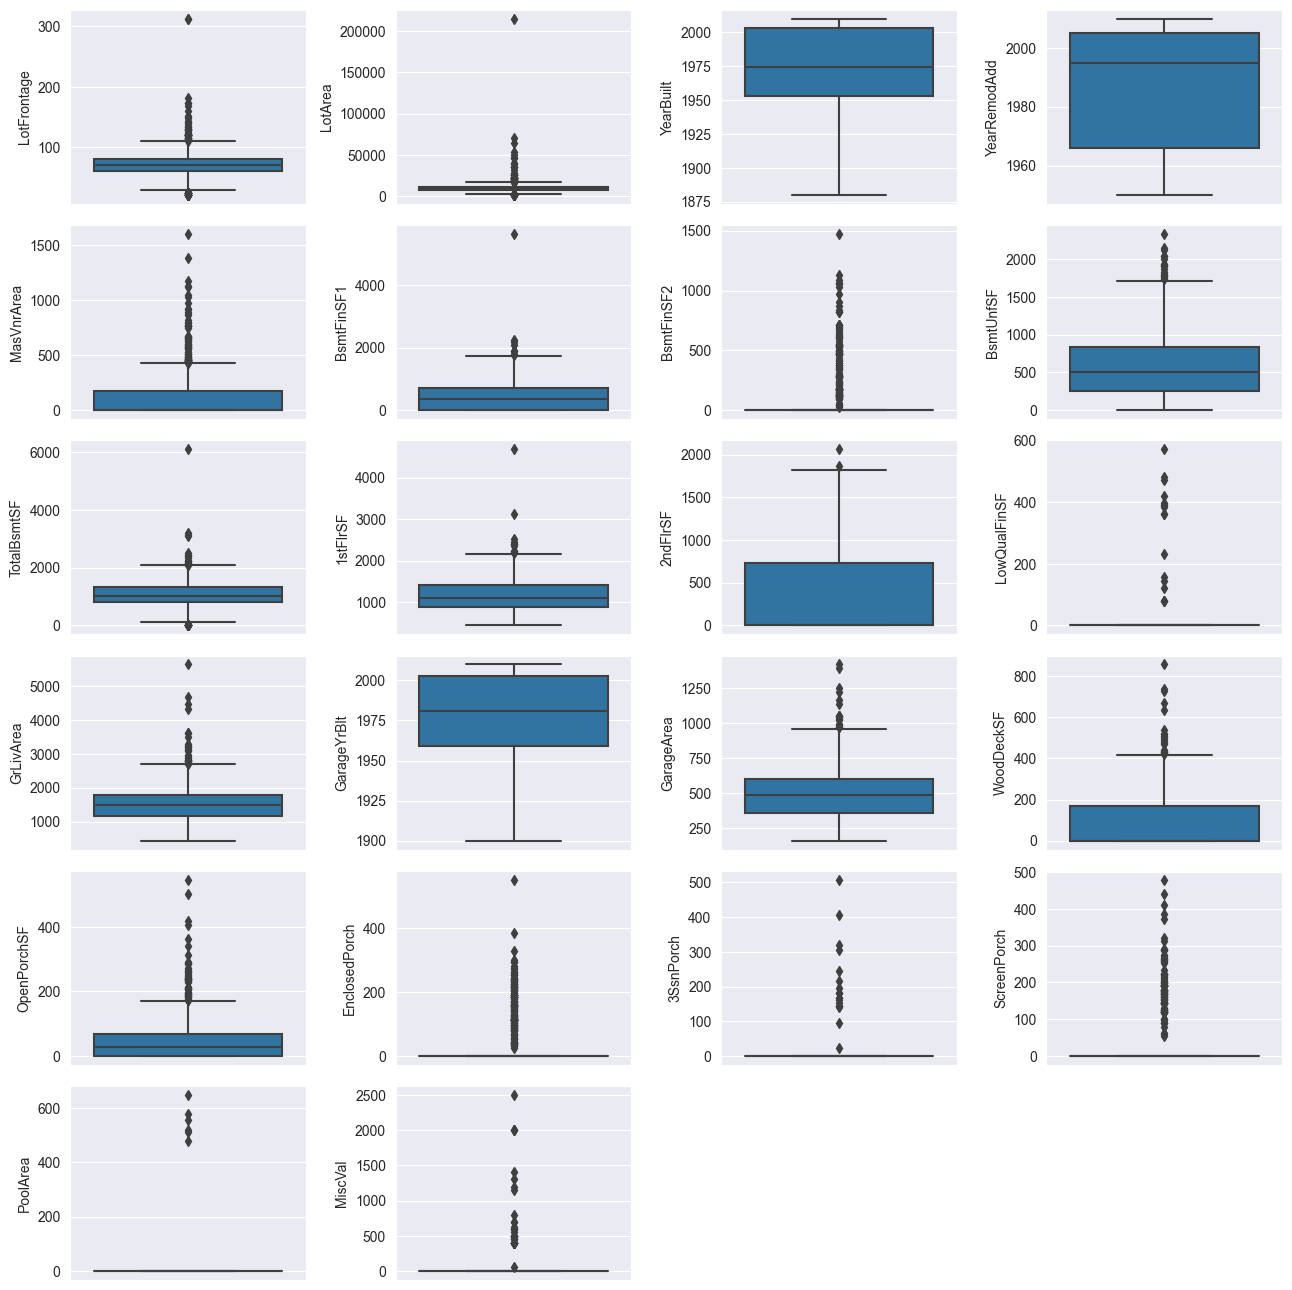

In [17]:
fig = plt.figure(figsize=(13,13))
for index,col in enumerate(lista_numeric_cont_features):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_features.dropna())
fig.tight_layout(pad=1.0)

## Variables numéricas discretas.

Veamos que ocurre con las variables numéricas discretas de nuestro dataset.

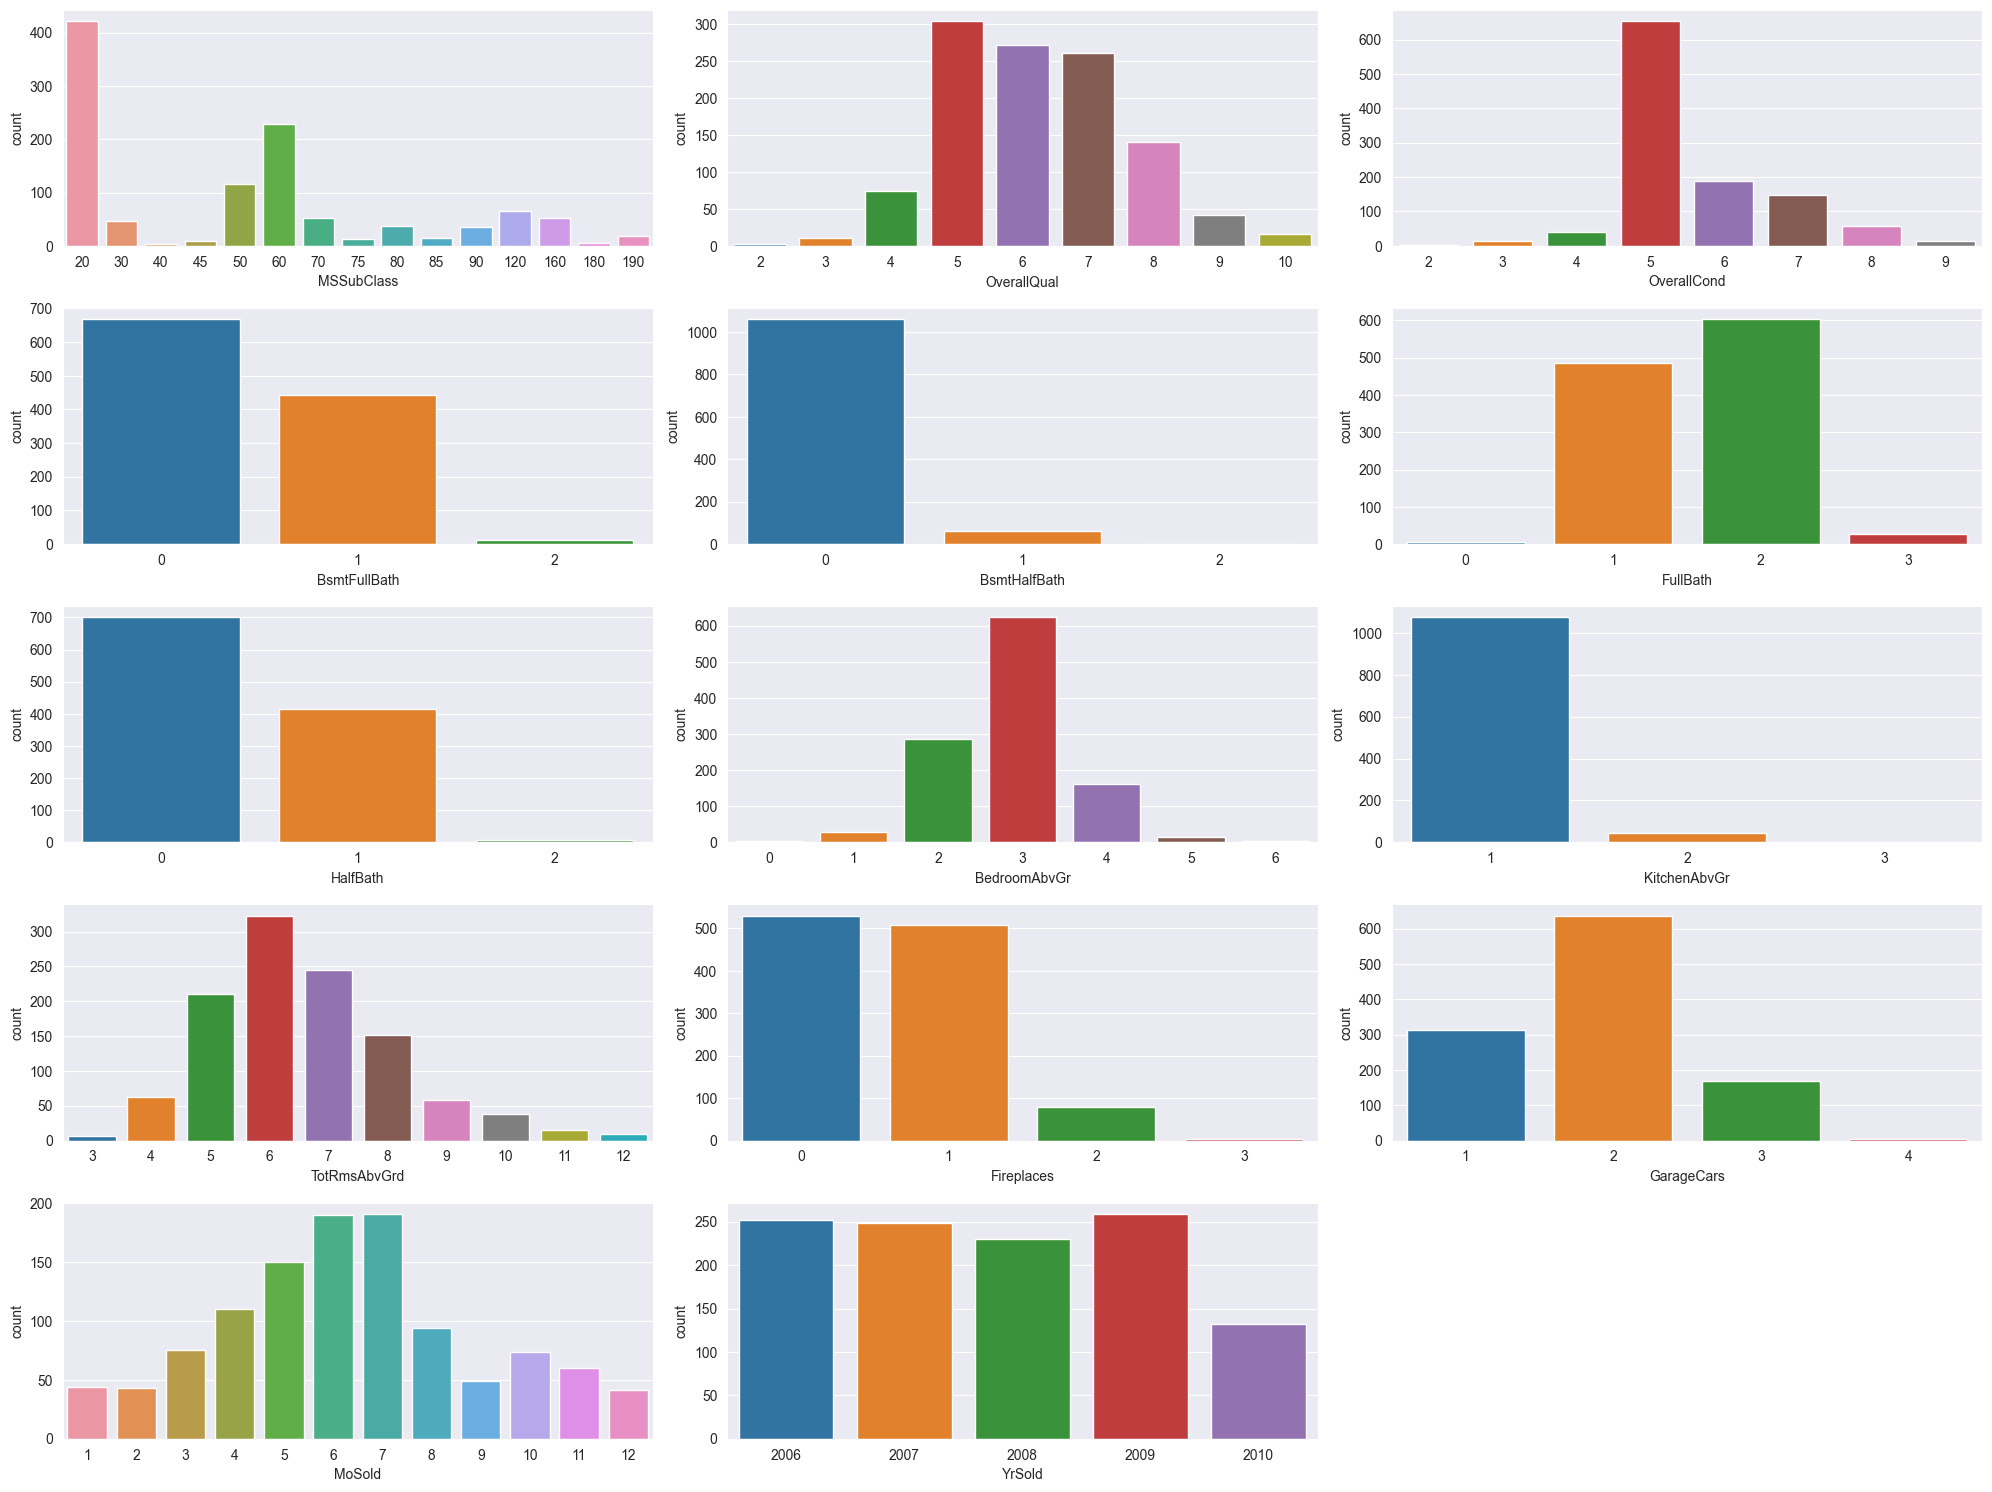

In [18]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_features):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_features.dropna())
fig.tight_layout(pad=1.0)

## Variables categóricas.
En cuanto  a las variables categóricas:


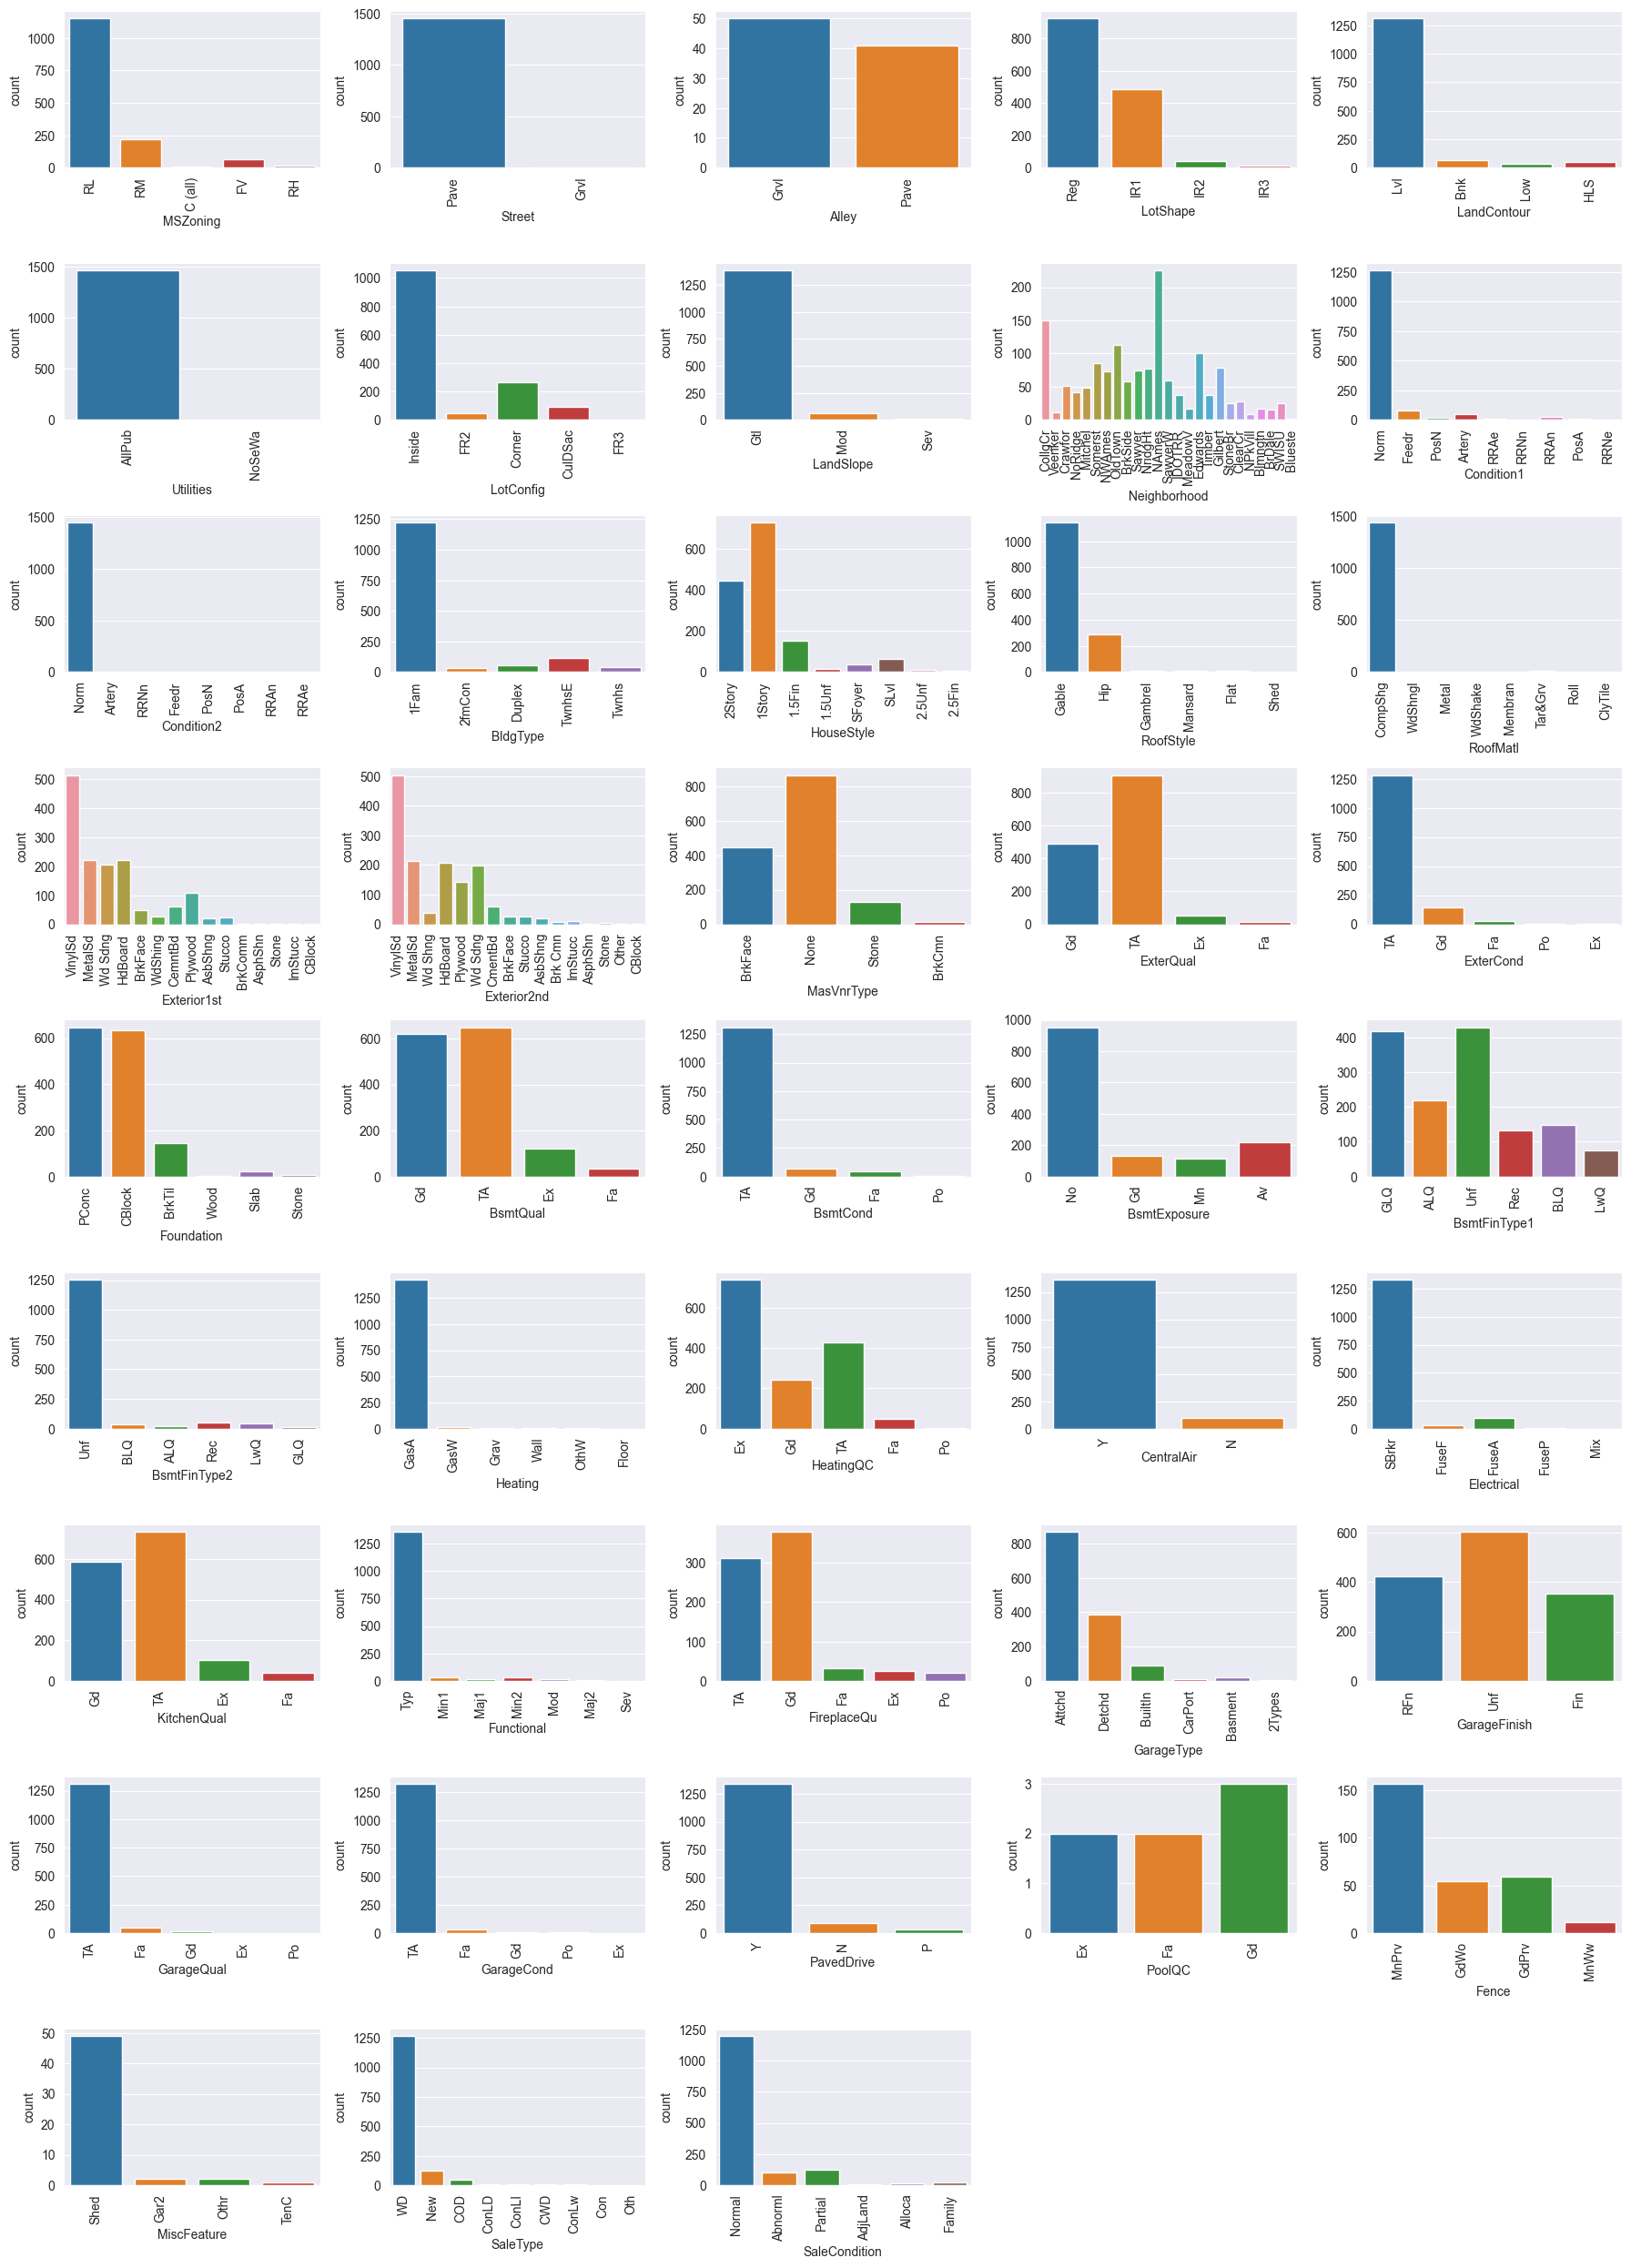

In [19]:
fig = plt.figure(figsize=(18,25))
for index in range(len(categorical_fetures.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=categorical_fetures.iloc[:,index], data=categorical_fetures.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

# Análisis bivariado.
El análisis bivariado examina 2 características diferentes para identificar cualquier posible relación o patrones distintivos entre las 2 características. Una de las técnicas comúnmente utilizadas es a través de la **Matriz de Correlación**. La matriz de correlación es una herramienta efectiva para descubrir la relación lineal (correlación) entre dos **características continuas**. La correlación no solo nos permite determinar qué características son importantes para Saleprice, sino también como medio para investigar cualquier **multicolinealidad** entre nuestros predictores independientes.  
La multicolinealidad ocurre cuando 2 o más variables independientes están altamente correlacionadas entre sí. En tal situación, causa pérdida de precisión en nuestros coeficientes de regresión, afectando nuestra capacidad para identificar las características más importantes que son más útiles para nuestro modelo

Podemos analizar a simple vista que existen características que están correlacionadas. 

In [20]:
df_train.GarageCars[:10]

0    2
1    2
2    2
3    3
4    3
5    2
6    2
7    2
8    2
9    1
Name: GarageCars, dtype: int64

In [21]:
df_train.GarageArea[:10]

0    548
1    460
2    608
3    642
4    836
5    480
6    636
7    484
8    468
9    205
Name: GarageArea, dtype: int64

In [22]:
df_train['GarageCars'].corr(df_train['GarageArea'])

0.8824754142814625

Si refelxionamos un poco entorno a estas dos variables, está claro que, a mayor plazas de garaje, el tamaño del mismo será mayor. 

Es cierto, que ir analizando cada una de las variables para determinarsi están correlacionadas con otra característica retrasa el trabajo. De ahí, que el siguiente mapa de calor de correlaciones permita determinar, qué variables numéricas están fuertemente correlacionadas.

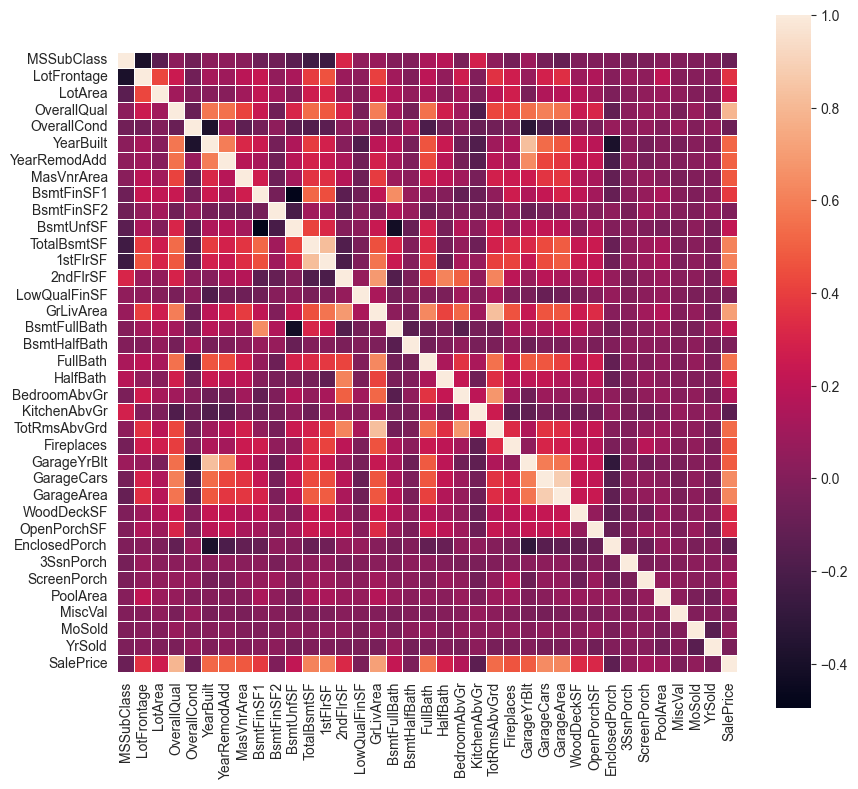

In [23]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, square=True, linewidth=0.5);

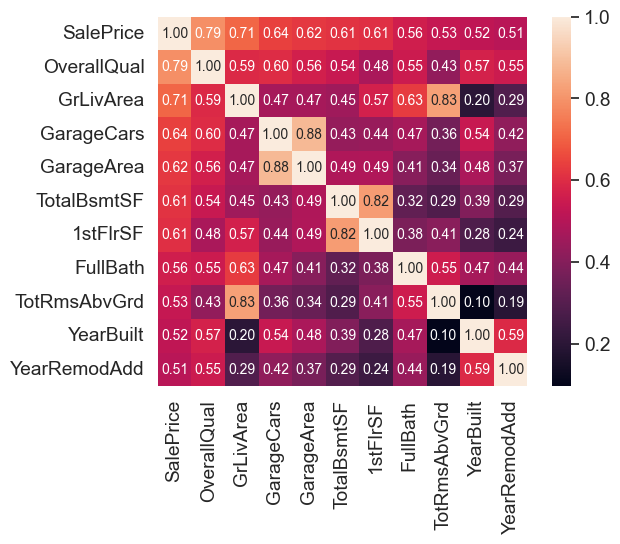

In [24]:
# muestra las puntuaciones de correlación
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**GarageCars** está fuertemente correlacionado (0.88) con GarageArea (algo que ya habíamos probado y que a simple vista se sabía). <br>
**TotalBsmtSF** está fuertemente correlacionado (0.82) con 1stFlrSF (la superficie total del sótano se correlaciona con los pies cuadrados de la primera planta). Obviamente, si el suelo es de unas determinadas dimensiones, la primera planta deberá ser acorde a esas dimensiones para que la casa sea estable. Tiene toda la lógica del mundo. <br>
**TotalRmsAbvGrd** está fuertemente correlacionada (0.83) con GrLivArea. El total de habitaciones encima del sótano se relaciona con metro por encima del suelo. <br>
**OverallQual** correlacionada (0.79) con **SalePrice** (IMPORTANTE).

In [25]:
THRESHOLD = 0.75
#Otra forma de averiguar las columnas que superan el umbral de correlación entre unas variables y otras.
# Matriz de correlación con valores absolutos
corr_matrix = df_train.corr().abs()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#Filtramos las columnas con una correlación por encima de un umbral.
to_drop = [column for column in upper.columns if any(upper[column] > THRESHOLD)]
to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

Además, **GarageYrBlt** también se relaciona fuertemente con YearBuilt.

Estas averiguaciones se hacen con el objetivo de evitar la pérdida de rendimiento en nuestro modelo.

# Correlación entre las variables numéricas y la variable que queremos predecir SalePrice.

A continuación, clasificamos la fuerza de la relación lineal entre Saleprice y otras características. VerallQual y GrLivArea tienen la relación lineal más fuerte con SalePrice. Por lo tanto, estas 2 características serán un factor importante en la predicción del precio de la vivienda

In [26]:
numeric_train = df_train.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)[:5]

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431


'SalePrice' está fuertemente relacionado con OverallQual, GrLivArea y GarageCars, GarageArea en menor medida.

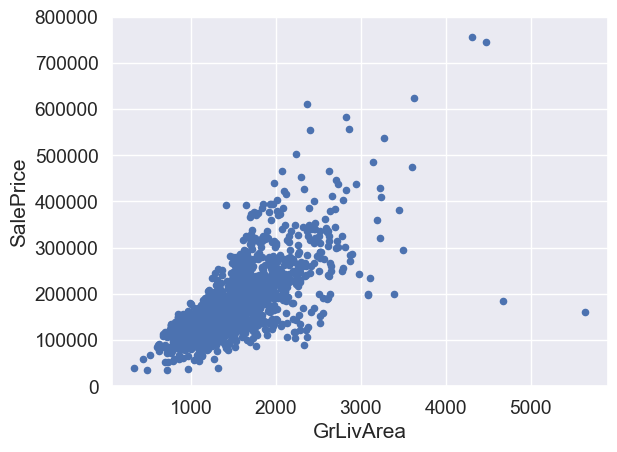

In [27]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Relación lineal entre GrLivArea y SalePrice. Hagámoslo para todas las variables numéricas.

## ScatterPlot

El uso de scatterplot también puede ayudarnos a identificar la relación lineal potencial entre las características numéricas. Aunque scatterplot no proporciona evidencia cuantitativa sobre la fuerza de la relación lineal entre nuestras características, es útil para ayudarnos a visualizar cualquier tipo de relación que la matriz de correlación no podría calcular. E.g Relaciones cuadráticas, exponenciales. 

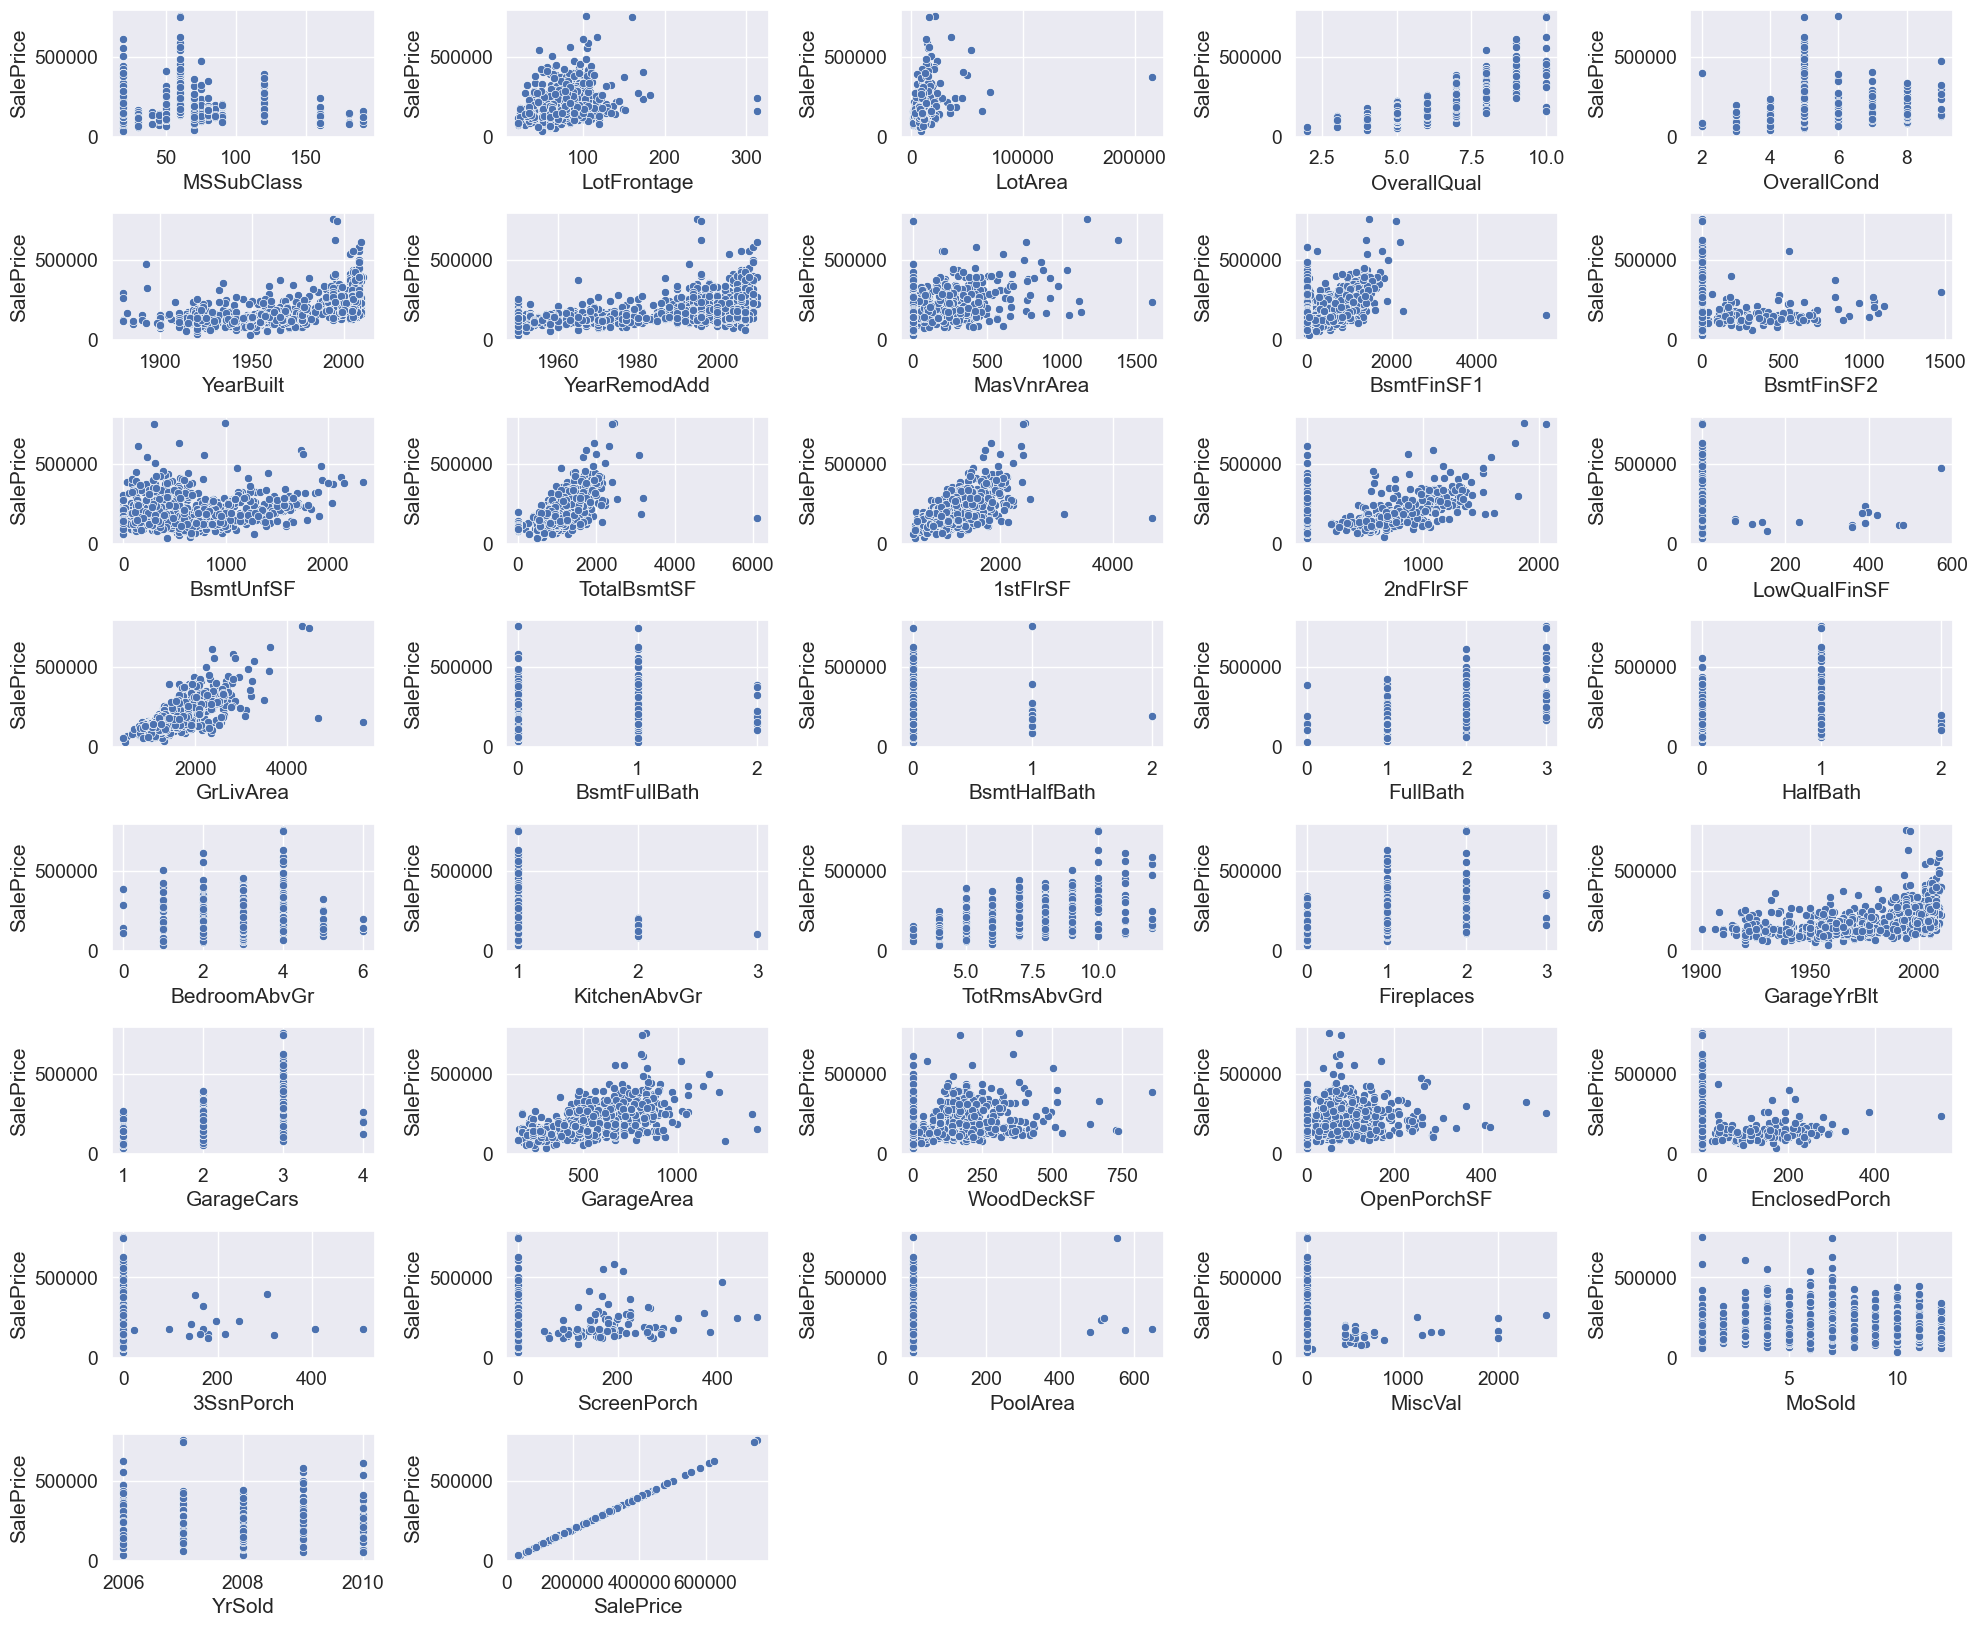

In [28]:
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_train.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=numeric_train.iloc[:,index], y='SalePrice', data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

**Observaciones**: <br>

* Nuestra variable objetivo (SalePrice) muestra un nivel de varianza desigual en la mayoría de las variables predictoras (independientes). Esto se llama **Heteroscedasticidad** y es una <span style="color:red">bandera roja</span> para el modelo de regresión lineal múltiple.
* Hay muchos valores atípicos en los gráficos de dispersión anteriores que me llamaron la atención. 

* Los dos en el borde superior derecho de **SalePrice vs. GrLivArea** parecen seguir una tendencia, que se puede explicar diciendo que "a medida que los precios aumentaron, también lo hizo la zona. 
* Sin embargo, los dos en la parte inferior derecha del mismo gráfico no siguen ninguna tendencia. Nos desharemos de estos dos a continuación.


<hr>

# Restricciones para un modelo de regresión.
Antes de construir un modelo de regresión lineal múltiple, debemos verificar que estas suposiciones a continuación sean válidas.

* **Linealidad ( Forma funcional correcta )** 
* **Homoscedasticidad ( Varianza de error constante )( vs Heteroscedasticidad ).**
* **Independencia de errores ( vs Autocorrelación )**
* **Normalidad multivariante ( Normalidad de errores )**
* **Poca o ninguna multicolinealidad.** 

Dado que encajamos en un modelo lineal, asumimos que la relación es **lineal**, y los errores, o residuos, son fluctuaciones aleatorias puras alrededor de la línea verdadera. Esperamos que la variabilidad en la variable de respuesta (dependiente) no aumente a medida que aumenta el valor del predictor (independiente), que es el supuesto de varianza igual, también conocido como **Homoscedasticidad**. También suponemos que las observaciones son independientes entre sí (**No Multicollinearity**), y no existe una correlación entre las observaciones secuenciales o la auto-correlación.

Ahora, estas suposiciones son propensas a suceder por completo.

Entonces, **¿Cómo comprobamos los supuestos de regresión? Ajustamos una línea de regresión y buscamos la variabilidad de los datos de respuesta a lo largo de la línea de regresión.** Apliquemos esto a cada uno de ellos.

**Linealidad:** 
La regresión lineal necesita que la relación entre cada variable independiente y la variable dependiente sea lineal. La hipótesis de linealidad se puede probar con diagramas de dispersión. Los dos ejemplos siguientes representan dos casos en los que no hay o hay poca linealidad

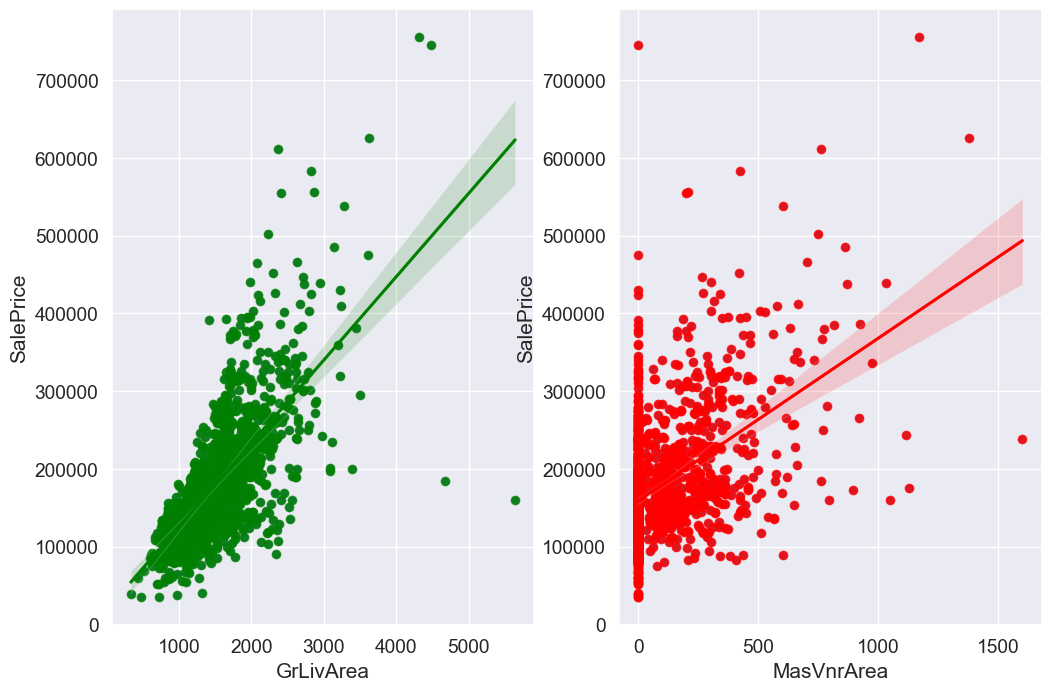

In [29]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = df_train.GrLivArea, y = df_train.SalePrice,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=df_train.GrLivArea, y=df_train.SalePrice, ax=ax1, color="green")

## Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = df_train.MasVnrArea,y =df_train.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=df_train.MasVnrArea, y=df_train.SalePrice, ax=ax2, color ="red");

Aquí estamos trazando nuestra variable objetivo con dos variables independientes **GrLivArea** y **MasVnrArea**. Es bastante evidente en el gráfico que existe una mejor relación lineal entre **SalePrice** y **GrLivArea** que **SalePrice** y **MasVnrArea**. Una cosa a tener en cuenta es que hay algunos valores atípicos en el conjunto de datos. Es imperativo verificar los valores atípicos ya que la regresión lineal es sensible a los efectos atípicos. A veces podemos estar tratando de encajar un modelo de regresión lineal cuando los datos pueden no ser tan lineales, o la función puede necesitar otro grado de libertad para adaptarse a los datos. En ese caso, es posible que tengamos que cambiar nuestra función en función de los datos para obtener el mejor ajuste posible. Además de eso, también podemos comprobar el gráfico residual, que nos dice cómo es la varianza de error a través de la línea verdadera. Veamos el gráfico residual de la variable independiente **GrLivArea** y nuestra variable objetivo **SalePrice **.

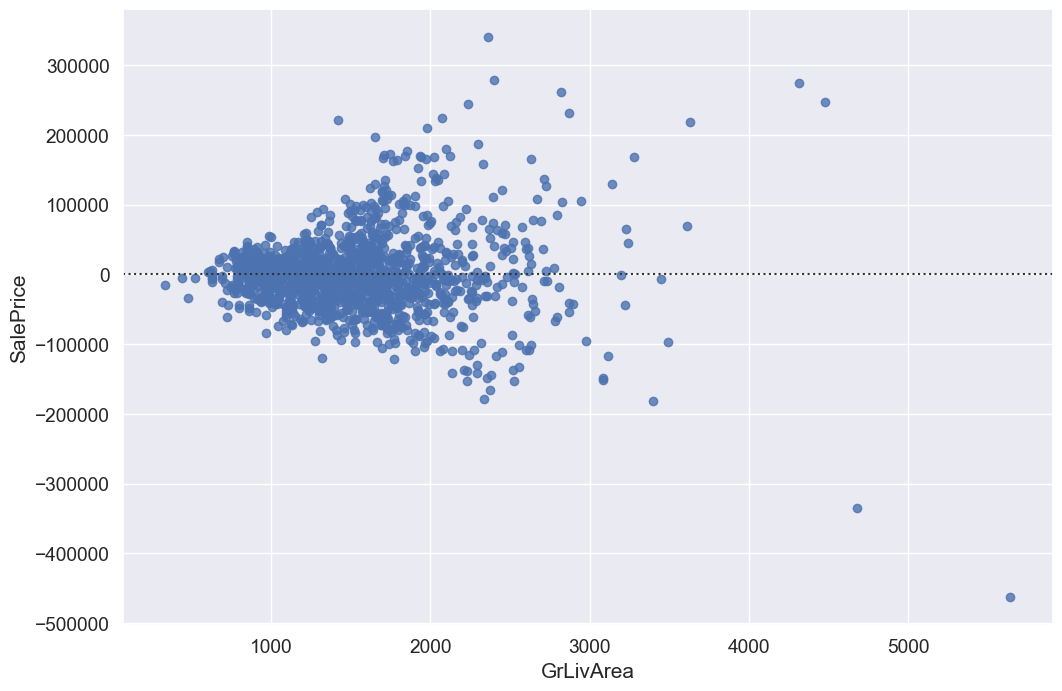

In [30]:
plt.subplots(figsize = (12,8))
sns.residplot(x = df_train.GrLivArea, y = df_train.SalePrice,data = df_train);

Idealmente, si se cumplen los supuestos, los residuos se dispersarán aleatoriamente alrededor de la línea central del cero sin un patrón aparente. El residual parecerá una nube no estructurada de puntos centrados alrededor de cero. Sin embargo, nuestra trama residual es cualquier cosa menos una nube de puntos no estructurada. Aunque parece que hay una relación lineal entre la variable de respuesta y la variable predictora, el gráfico residual se parece más a un embudo. El gráfico de errores muestra que a medida que aumenta el valor **GrLivArea**, también aumenta la varianza, que es la característica conocida como **Heteroscedasticidad**. Vamos a romper esto. 

**Homoscedasticidad ( Varianza constante ):** 
La suposición de homoscedasticidad es crucial para los modelos de regresión lineal. Homoscedasticidad describe una situación en la que el término de error o varianza o el "ruido" o perturbación aleatoria en la relación entre las variables independientes y la variable dependiente es el mismo en todos los valores de la variable independiente. En otras palabras, hay una varianza constante presente en la variable de respuesta a medida que aumenta la variable predictora. Si el "ruido" no es el mismo en los valores de una variable independiente como la gráfica residual anterior, lo llamamos **Heteroscedasticidad**. Como puedes ver, es lo contrario de **Homocedasticidad.***

Esta parcela es un excelente ejemplo de homoscedasticidad. La varianza residual es la misma que el valor de los aumentos de la variable predictora. Una forma de arreglar esta heteroscedasticidad es usando un método de transformación como log-transformation o box-cox transformation que ya lo usamos anteriormente.

**Normalidad multivariante ( Normalidad de errores):**
El análisis de regresión lineal requiere que la variable dependiente sea multivariable normalmente distribuida. Un histograma, un diagrama de caja o un Q-Q-Plot pueden verificar si la variable objetivo está normalmente distribuida. La prueba de bondad de ajuste, por ejemplo, la prueba de Kolmogorov-Smirnov puede verificar la normalidad en la variable dependiente. Ya sabemos que nuestra variable objetivo no sigue una distribución normal pero ya hemos hecho la transformación logarítima para que esta condición funcionase.

In [31]:
df_train["SalePrice"] = np.log(df_train['SalePrice']) #ya lo vimos arriba.

# Preprocesado de los datos.
Eliminaremos las variables que son repetidas. <br>
Trataremos los valores atípicos. <br>
Rellenaremos los valores faltantes. <br>

Primero eliminamos aquellas columnas que tienen una fuerte correlación entre sí, con esto evitaremos la multicolinealidad.
## Variables con multicolinealidad. (eliminación)

In [32]:
#eliminamos GarageCars porque tiene menos correlación con SalePrice que GarageArea
df_train = df_train.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1)

In [33]:
df_train.shape

(1460, 76)

El modelo lineal ya cumplicará inexistencia de multicolinealidad.

## Manejo de valores faltantes (NaN)

En las estadísticas, los datos que faltan, o los valores que faltan, se producen cuando no se almacena ningún valor de datos para la variable en una observación. Los datos que faltan son comunes y pueden tener un efecto significativo en las conclusiones que se pueden extraer de los datos. El objetivo de las operaciones de limpieza es prevenir los problemas causados por la falta de datos que pueden surgir al entrenar un modelo.

Consideraremos que cuando falten más el 20% de los datos, debemos eliminar la variable correspondiente y fingir que nunca existió. Esto significa que no intentaremos ningún truco para llenar los datos que faltan en esos casos. 

<AxesSubplot: >

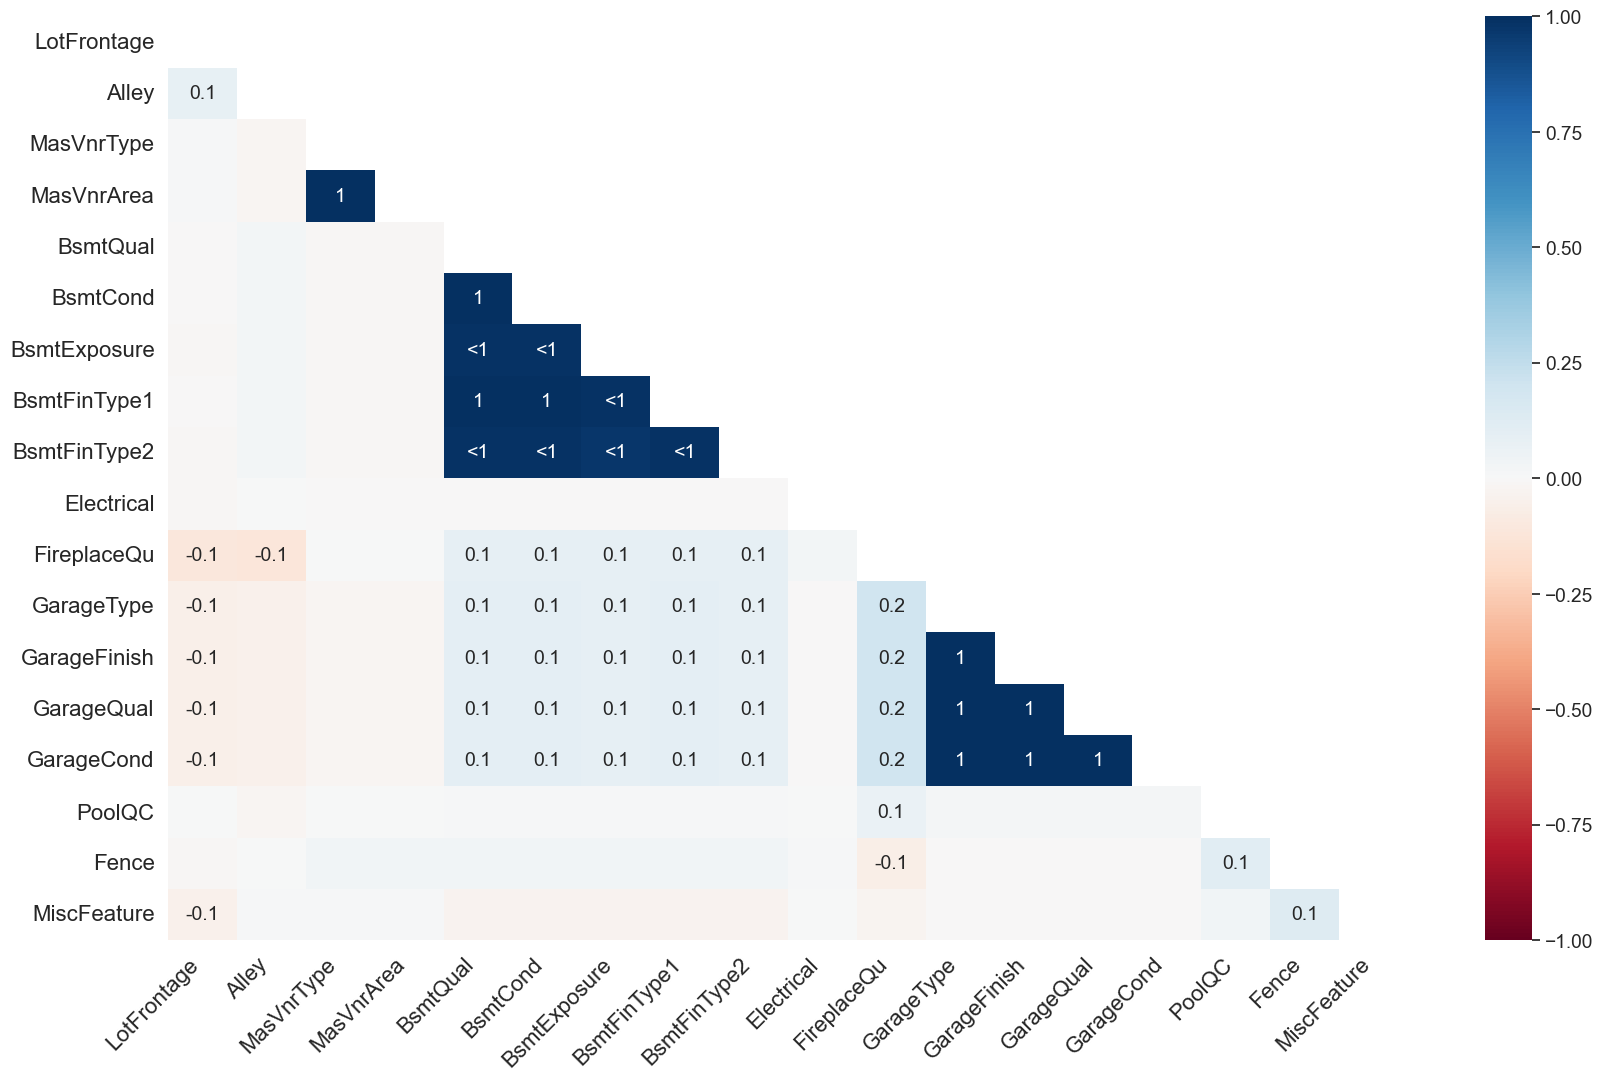

In [34]:
#Con esta matriz, se puede encontrar muy rápidamente el patrón de ausencia en el conjunto de datos
msno.heatmap(df_train)

<AxesSubplot: title={'center': 'Number of missing rows'}, xlabel='features', ylabel='sum'>

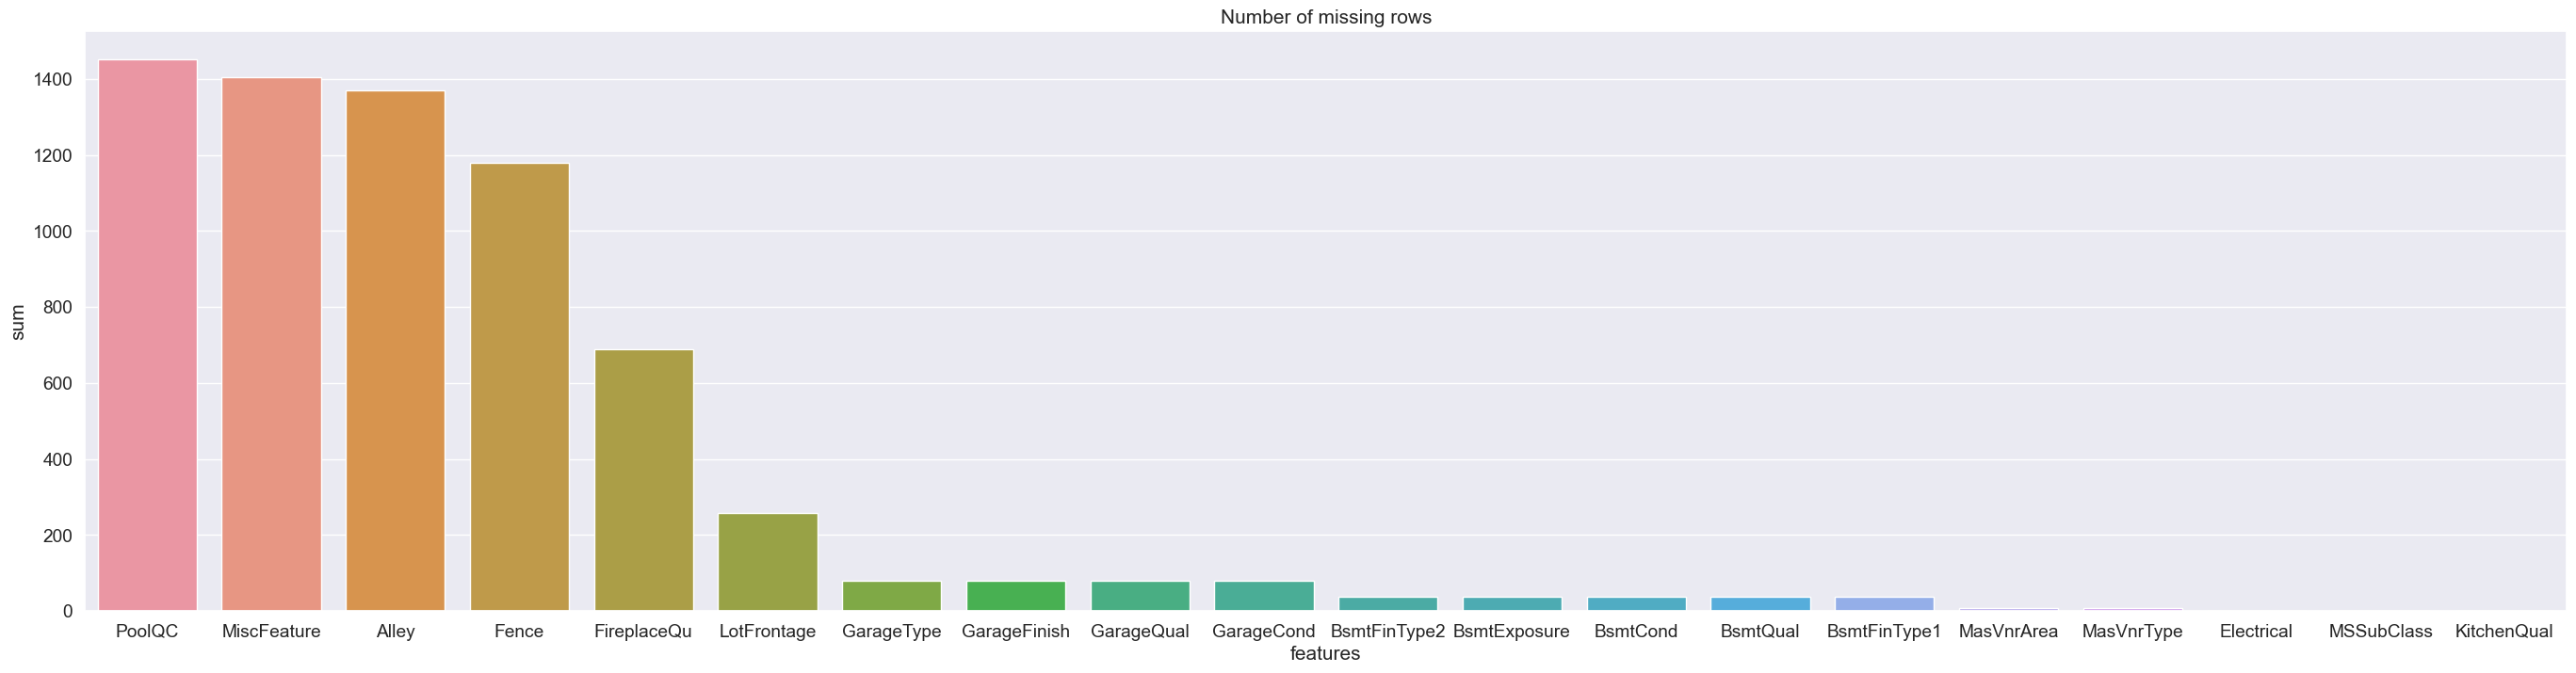

In [35]:
plt.figure(figsize=(34,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(df_train.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

El porcentaje de valores faltantes correspondientes a cada columna corresponde a:

In [36]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479


In [37]:
percentage_nan_values = df_train.isnull().sum()/len(df_train)
df_percentage_nan_values = pd.DataFrame(data=missing_data, columns = ['Percent'])
for column in df_percentage_nan_values:
    porcentage_plus_fifty = missing_data[missing_data.Percent > 0.2]
    print(porcentage_plus_fifty.sort_values(by = ['Percent'], ascending = False))

             Total   Percent
PoolQC        1453  0.995205
MiscFeature   1406  0.963014
Alley         1369  0.937671
Fence         1179  0.807534
FireplaceQu    690  0.472603


Según lo obtenido, hay un conjunto de variables como MiscFeature, PoolQC (calidad de la piscina), Fence ( si está la casa vallada), tec que superan este porcentaje de valores faltantes, asique procedemos a eliminarlos de nuestros dataset ya que ninguna de estas variables parece ser muy importante, ya que muchas de ellas no son aspectos en los que pensamos a la hora de realizar la compra de una casa.

In [38]:
df_train = df_train.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu' ])

Ninguna de estas variables parece ser muy importante a la hora de generar nuestro modelo. Además, son fuertes candidatas de poseer valores atípicos asique estaremos contentos de eliminarlas. En relación a GarageType, GarageFinish, GarageQual, GarageCond, observamos que tienen el mismi número de valores faltantes. Dado que la información más relevante la da la variable GarageArea, eliminaré las anteriores características.

In [39]:
df_train = df_train.drop(columns = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], axis=1)

In [40]:
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


La misma lógica puede ser aplicada a BsmtFinType2, BsmtExposure, BsmtCond, BsmtQual, BsmtFinType1.

In [41]:
df_train = df_train.drop(columns = ['BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1'], axis=1)

En cuanto a MasVnrArea y MasVnrType, podemos decir que no son esenciales en nuestro estudio. Además tienen una fuerte correlación con YeearBlt y OverallQual que ya se consideran. Por lo tanto, no perdemos información si no las consideramos.

In [42]:
df_train = df_train.drop(columns = ['MasVnrArea', 'MasVnrType'], axis=1)

In [43]:
df_train.shape[1]

60

In [44]:
#Electrical solo tiene un valor faltante asique lo eliminamos
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

## Eliminar características que no tienen correlación con SalePrice.
* También eliminaremos las características que **no tienen ninguna relación lineal con target *SalePrice***. Podemos ver en la siguiente parcela que el MoSold y YrSold no tienen ningún impacto en el precio de la casa vendida.

In [45]:
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False).tail(8)

,SalePrice
BsmtHalfBath,-0.016844
MiscVal,-0.021190
LowQualFinSF,-0.025606
YrSold,-0.028923
OverallCond,-0.077856
MSSubClass,-0.084284
EnclosedPorch,-0.128578
KitchenAbvGr,-0.135907


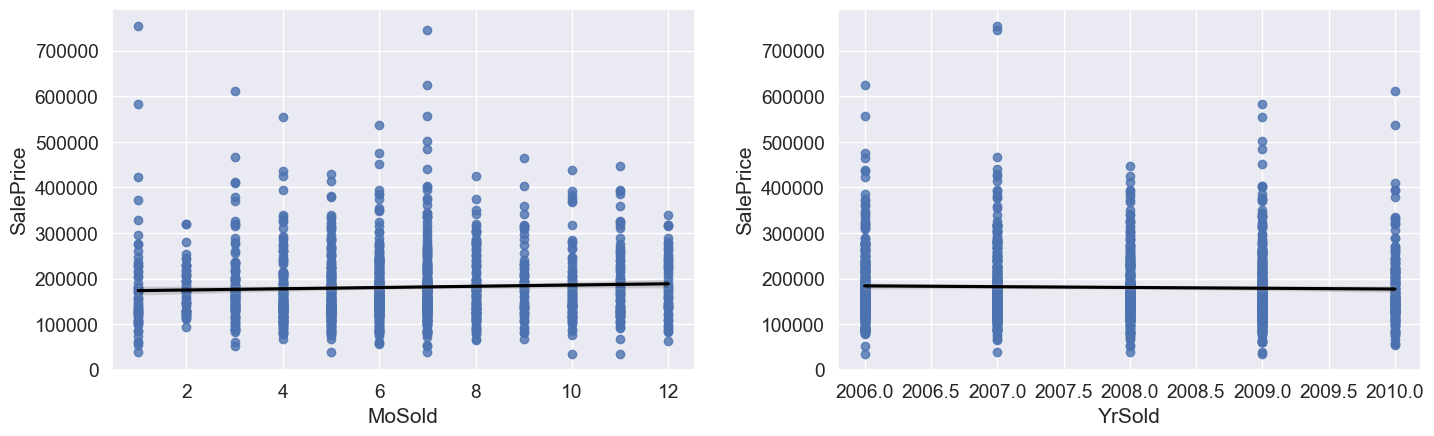

In [46]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
sns.regplot(x=numeric_train['MoSold'], y='SalePrice', data=numeric_train, ax = axes[0], line_kws={'color':'black'})
sns.regplot(x=numeric_train['YrSold'], y='SalePrice', data=numeric_train, ax = axes[1],line_kws={'color':'black'})
fig.tight_layout(pad=2.0)

In [47]:
df_train = df_train.drop(['YrSold','MoSold'], axis=1)

## Eliminación de características que poseen únicamente un valor.

Anteriormente, durante nuestro análisis univariable, encontramos que algunas características consisten principalmente en un solo valor o 0, que no es útil para la creación del modelo. Por lo tanto, establecemos un umbral definido por el usuario en el 96%. Si una columna tiene más del 96% del mismo valor, haremos que las características sean inútiles y las eliminaremos, ya que no hay mucha información que podamos substraer.

In [48]:
categ_cols = df_train.select_dtypes(include=['object']).columns
overfit_cat = []
for i in categ_cols:
    counts = df_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_train) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
#eliminamos dichas columnas
df_train = df_train.drop(overfit_cat, axis=1)

In [49]:
num_col = df_train.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_num = []
for i in num_col:
    counts = df_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_train) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
#eliminamos dichas columnas
df_train = df_train.drop(overfit_num, axis=1)

In [50]:
print("Variables categóricas con > 96% del mismo valor: ",overfit_cat)
print("Variables numéricas con > 96% del mismo valor: ",overfit_num)

Variables categóricas con > 96% del mismo valor:  ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
Variables numéricas con > 96% del mismo valor:  ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


## Eliminación de outliers.

Eliminar valores atípicos evitará que el rendimiento de nuestros modelos se vea afectado por valores extremos.  De nuestro boxplot anterior, hemos identificado las siguientes características con valores extremos:
* LotFrontage
* LotArea
* BsmtFinSF1
* TotalBsmtSF
* GrLivArea

Eliminaremos los valores atípicos en función de cierto valor umbral.

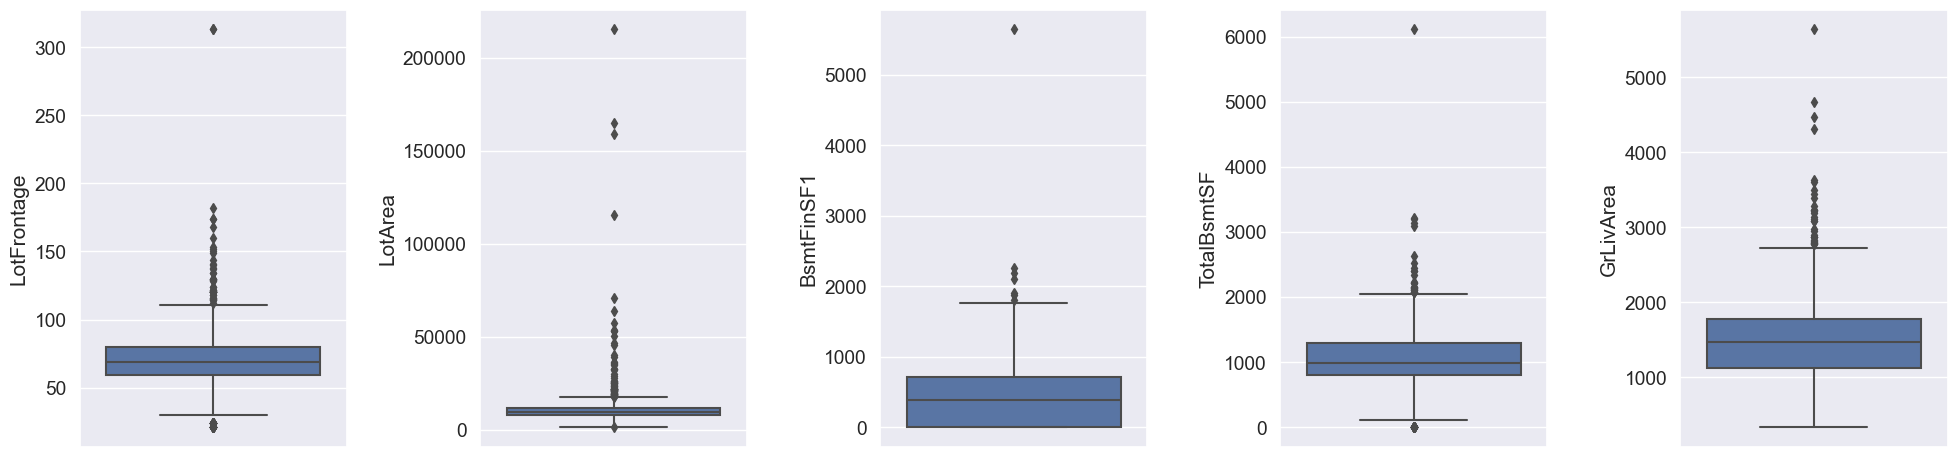

In [51]:
out_col = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea']
fig = plt.figure(figsize=(20,5))
for index,col in enumerate(out_col):
    plt.subplot(1,5,index+1)
    sns.boxplot(y=col, data=df_train)
fig.tight_layout(pad=1.5)

In [52]:
df_train = df_train.drop(df_train[df_train['LotFrontage'] > 200].index)
df_train = df_train.drop(df_train[df_train['LotArea'] > 100000].index)
df_train = df_train.drop(df_train[df_train['BsmtFinSF1'] > 4000].index)
df_train = df_train.drop(df_train[df_train['TotalBsmtSF'] > 5000].index)
df_train = df_train.drop(df_train[df_train['GrLivArea'] > 4000].index)

## Rellenar los valores que faltan.

Nuestro modelo de aprendizaje automático es incapaz de hacer frente a los valores que faltan, por lo que tenemos que lidiar con ellos en función de nuestra comprensión de las características. Estos valores que faltan se indican **NAN** como hemos visto anteriormente durante nuestra exploración de datos.

In [53]:
pd.DataFrame(df_train.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(5)

,sum
LotFrontage,256
MSSubClass,0
KitchenQual,0
CentralAir,0
Electrical,0


## Variables numéricas
Para **Numerical Features**, el enfoque común será reemplazar el valor que falta con la media de la distribución de características.  
Sin embargo, ciertas características como *LotFrontage*  tienen una amplia variación en su distribución. Tomando los valores medios a través de *Neighborhoods*, veremos que la media varía mucho desde solo tomar el valor medio de estas columnas individuales, ya que cada vecindario tiene diferentes valores medios LotFrontage. Por lo tanto, decidí agrupar estas características por Vecindarios para imputar los respectivos valores medios.

In [54]:
print("Mean of LotFrontage: ", df_train['LotFrontage'].mean())

Mean of LotFrontage:  69.41959798994975


In [55]:
neigh_lot = df_train.groupby('Neighborhood')['LotFrontage'].mean().reset_index(name='LotFrontage_mean')

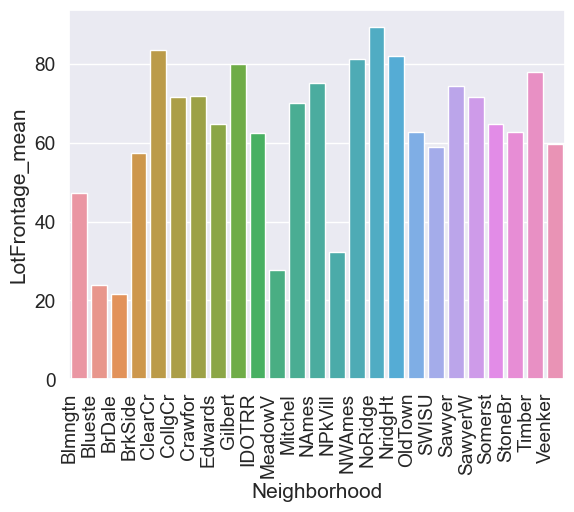

In [56]:
plot = sns.barplot(x='Neighborhood', y='LotFrontage_mean', data=neigh_lot)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [57]:
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [58]:
df_train.isnull().sum().max()

0

Hemos conseguido limpiar el dataset de valores faltantes.

# Convertir variables categóricas a numéricas.

In [59]:
df_train = pd.get_dummies(df_train)

# Modelización del problema.

Comenzaremos con uno de los modelos de aprendizaje automático más básicos pero útiles, **Regresión Lineal**. Sin embargo, no dejes que la simplicidad de este modelo te engañe, ya que la regresión lineal es la base de algunos de los modelos más complejos que existen. Para entender este modelo, solo utilizaremos dos características, **SalePrice** y *GrLivArea**. Tomemos una muestra de los datos y grafiquémoslos.

In [65]:
X = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values

In [71]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2020)